# Q1

Q1-1

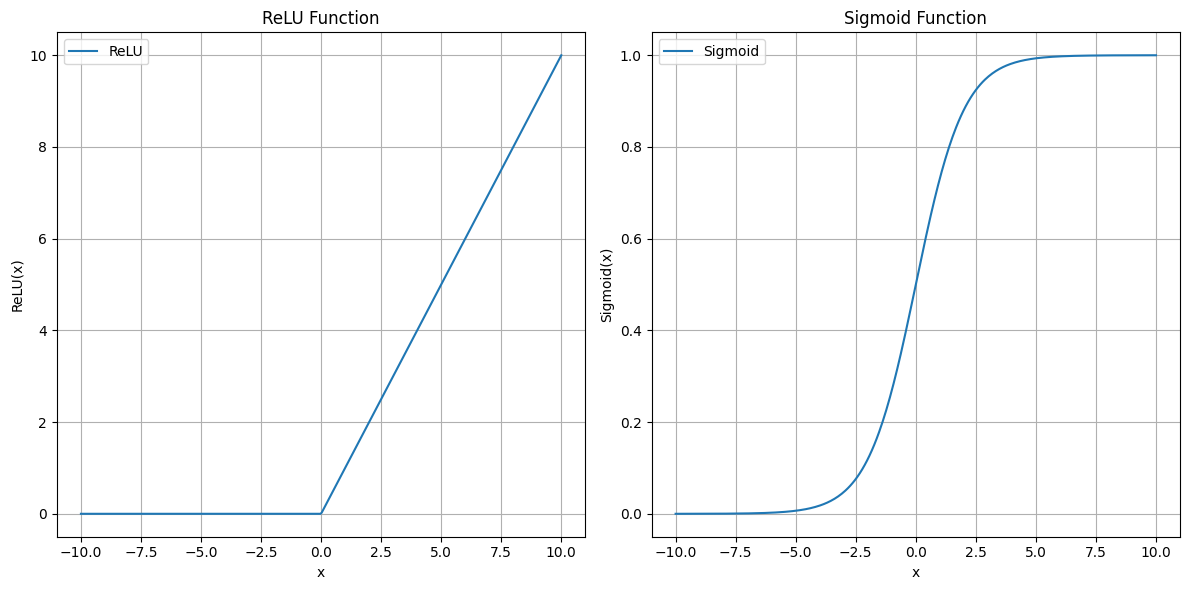

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ReLU function
def relu(x):
    return np.maximum(0, x)

# Define the Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate a range of values from -10 to 10 for x
x = np.linspace(-10, 10, 400)

# Compute the ReLU and Sigmoid values
y_relu = relu(x)
y_sigmoid = sigmoid(x)

# Create the plot
plt.figure(figsize=(12, 6))

# Plotting ReLU
plt.subplot(1, 2, 1)
plt.plot(x, y_relu, label="ReLU")
plt.title("ReLU Function")
plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.grid(True)
plt.legend()

# Plotting Sigmoid
plt.subplot(1, 2, 2)
plt.plot(x, y_sigmoid, label="Sigmoid")
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


Q1-2

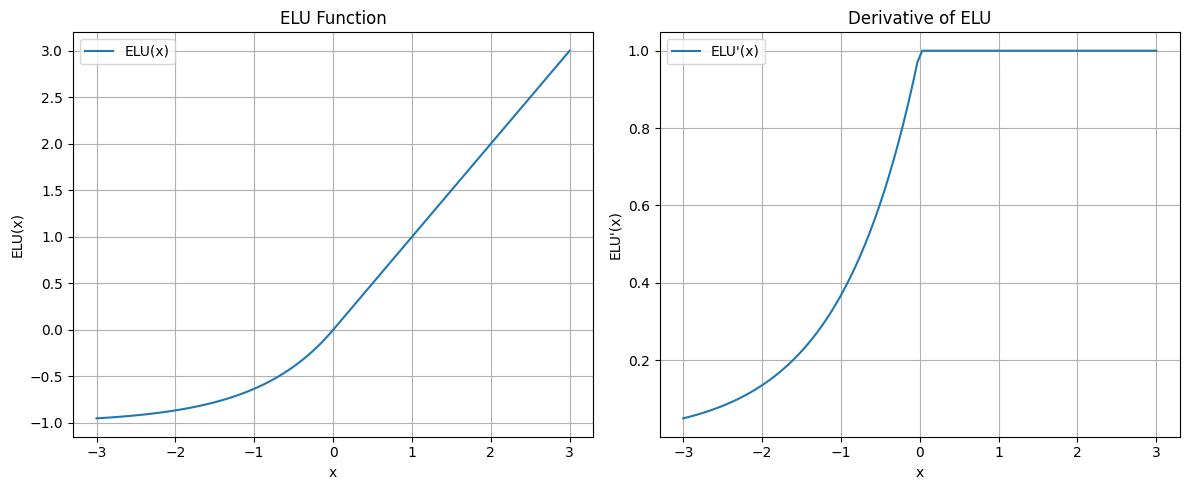

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def elu(x, alpha=1.0):
    # ELU activation function
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def elu_derivative(x, alpha=1.0):
    # Derivative of the ELU function
    return np.where(x > 0, 1, alpha * np.exp(x))

# Generate x values from -3 to 3
x = np.linspace(-3, 3, 100)

# Calculate ELU and its derivative for the range
y_elu = elu(x)
y_elu_derivative = elu_derivative(x)

# Create the plot
plt.figure(figsize=(12, 5))

# Plotting the ELU function
plt.subplot(1, 2, 1)
plt.plot(x, y_elu, label="ELU(x)")
plt.title("ELU Function")
plt.xlabel("x")
plt.ylabel("ELU(x)")
plt.grid(True)
plt.legend()

# Plotting the derivative of the ELU
plt.subplot(1, 2, 2)
plt.plot(x, y_elu_derivative, label="ELU'(x)")
plt.title("Derivative of ELU")
plt.xlabel("x")
plt.ylabel("ELU'(x)")
plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


Q1-3

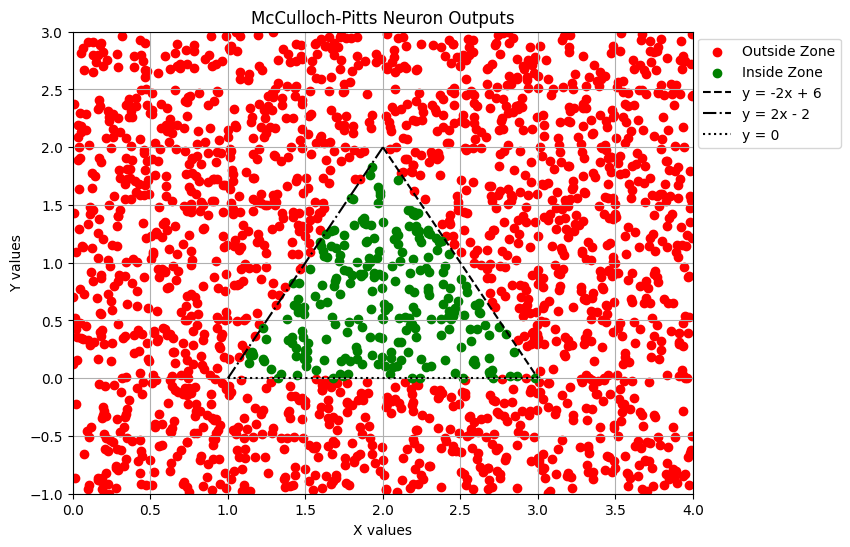

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define McCulloch-Pitts Neuron
class McCullochPittsNeuron:
    def __init__(self, weights, threshold):
        self.weights = weights
        self.threshold = threshold

    def model(self, X):
        return 1 if (np.dot(self.weights, X) + self.threshold) >= 0 else 0

# Define function to determine if point is inside triangle
def is_point_in_triangle(x, y):
    neuron1 = McCullochPittsNeuron([-2, -1], 6)
    neuron2 = McCullochPittsNeuron([2, -1], -2)
    neuron3 = McCullochPittsNeuron([0, 1], 0)
    neuron4 = McCullochPittsNeuron([1, 1, 1], -3)

    zone1 = neuron1.model(np.array([x, y]))
    zone2 = neuron2.model(np.array([x, y]))
    zone3 = neuron3.model(np.array([x, y]))
    zone4 = neuron4.model(np.array([zone1, zone2, zone3]))

    return zone4

# Generate random points
num_points = 2000
x_values = np.random.uniform(0, 4, num_points)
y_values = np.random.uniform(-1, 3, num_points)

# Classify points
red_points = []  # outside zone
green_points = []  # inside zone

for x, y in zip(x_values, y_values):
    if is_point_in_triangle(x, y) == 0:
        red_points.append((x, y))
    else:
        green_points.append((x, y))

# Separate x and y values for red and green points
red_x, red_y = zip(*red_points)
green_x, green_y = zip(*green_points)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(red_x, red_y, color='red', label='Outside Zone')
plt.scatter(green_x, green_y, color='green', label='Inside Zone')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('McCulloch-Pitts Neuron Outputs')

# Plot decision boundaries
plt.plot([2, 3], [2, 0], color='black', linestyle='--', label='y = -2x + 6')
plt.plot([1, 2], [0, 2], color='black', linestyle='-.', label='y = 2x - 2')
plt.plot([1, 3], [0, 0], color='black', linestyle=':', label='y = 0')

plt.grid(True)

# Set axis limits
plt.xlim(0, 4)
plt.ylim(-1, 3)

# Position the legend
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.0))

# Save plot as a PNG file
plt.savefig('c.png', bbox_inches='tight')

# Show plot
plt.show()


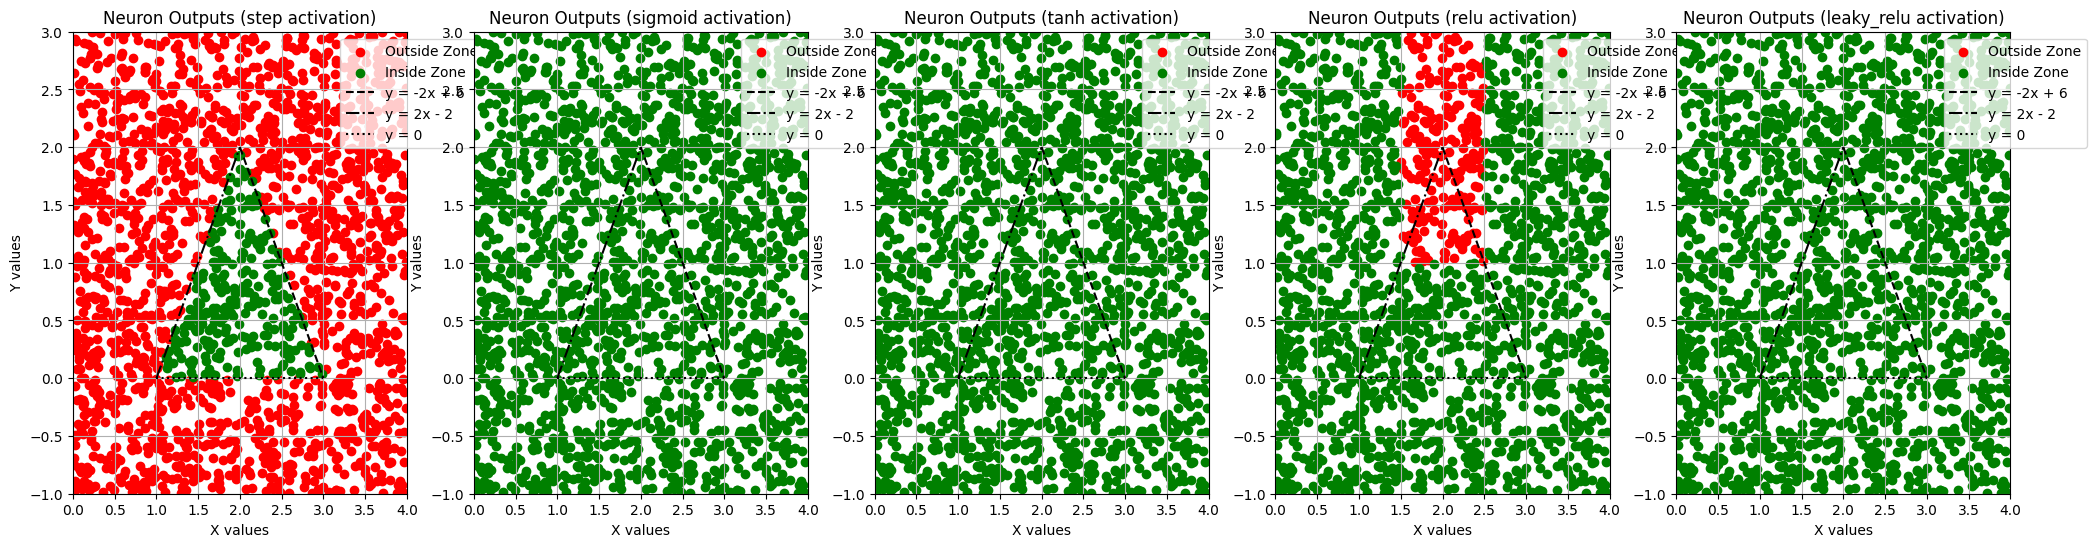

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define McCulloch-Pitts Neuron with different activation functions
class McCullochPittsNeuron:
    def __init__(self, weights, threshold, activation='step'):
        self.weights = weights
        self.threshold = threshold
        self.activation = activation

    def step_function(self, x):
        return 1 if x >= 0 else 0

    def sigmoid_function(self, x):
        return 1 / (1 + np.exp(-x))

    def tanh_function(self, x):
        return np.tanh(x)

    def relu_function(self, x):
        return np.maximum(0, x)

    def leaky_relu_function(self, x):
        return np.where(x > 0, x, x * 0.01)

    def model(self, X):
        net_input = np.dot(self.weights, X) + self.threshold
        if self.activation == 'step':
            return self.step_function(net_input)
        elif self.activation == 'sigmoid':
            return self.sigmoid_function(net_input)
        elif self.activation == 'tanh':
            return self.tanh_function(net_input)
        elif self.activation == 'relu':
            return self.relu_function(net_input)
        elif self.activation == 'leaky_relu':
            return self.leaky_relu_function(net_input)
        else:
            raise ValueError("Unknown activation function")

# Define function to determine if point is inside triangle using different activations
def is_point_in_triangle(x, y, activation='step'):
    neuron1 = McCullochPittsNeuron([-2, -1], 6, activation)
    neuron2 = McCullochPittsNeuron([2, -1], -2, activation)
    neuron3 = McCullochPittsNeuron([0, 1], 0, activation)
    neuron4 = McCullochPittsNeuron([1, 1, 1], -3, activation)

    zone1 = neuron1.model(np.array([x, y]))
    zone2 = neuron2.model(np.array([x, y]))
    zone3 = neuron3.model(np.array([x, y]))
    zone4 = neuron4.model(np.array([zone1, zone2, zone3]))

    return zone4

# Generate random points
num_points = 2000
x_values = np.random.uniform(0, 4, num_points)
y_values = np.random.uniform(-1, 3, num_points)

# Helper function to classify points based on activation function
def classify_points(activation):
    red_points = []  # outside zone
    green_points = []  # inside zone

    for x, y in zip(x_values, y_values):
        if is_point_in_triangle(x, y, activation) == 0:
            red_points.append((x, y))
        else:
            green_points.append((x, y))

    return red_points, green_points

# Classify points using different activation functions
activations = ['step', 'sigmoid', 'tanh', 'relu', 'leaky_relu']
results = {activation: classify_points(activation) for activation in activations}

# Plotting
fig, axs = plt.subplots(1, 5, figsize=(25, 6))

for i, activation in enumerate(activations):
    red_points, green_points = results[activation]
    if red_points:
        red_x, red_y = zip(*red_points)
    else:
        red_x, red_y = [], []
    if green_points:
        green_x, green_y = zip(*green_points)
    else:
        green_x, green_y = [], []

    axs[i].scatter(red_x, red_y, color='red', label='Outside Zone')
    axs[i].scatter(green_x, green_y, color='green', label='Inside Zone')
    axs[i].set_xlabel('X values')
    axs[i].set_ylabel('Y values')
    axs[i].set_title(f'Neuron Outputs ({activation} activation)')

    # Plot decision boundaries
    axs[i].plot([2, 3], [2, 0], color='black', linestyle='--', label='y = -2x + 6')
    axs[i].plot([1, 2], [0, 2], color='black', linestyle='-.', label='y = 2x - 2')
    axs[i].plot([1, 3], [0, 0], color='black', linestyle=':', label='y = 0')

    axs[i].grid(True)
    axs[i].set_xlim(0, 4)
    axs[i].set_ylim(-1, 3)
    axs[i].legend(loc='upper right', bbox_to_anchor=(1.25, 1.0))

# Save plot as a PNG file
plt.savefig('decision_comparison.png', bbox_inches='tight')

# Show plot
plt.show()


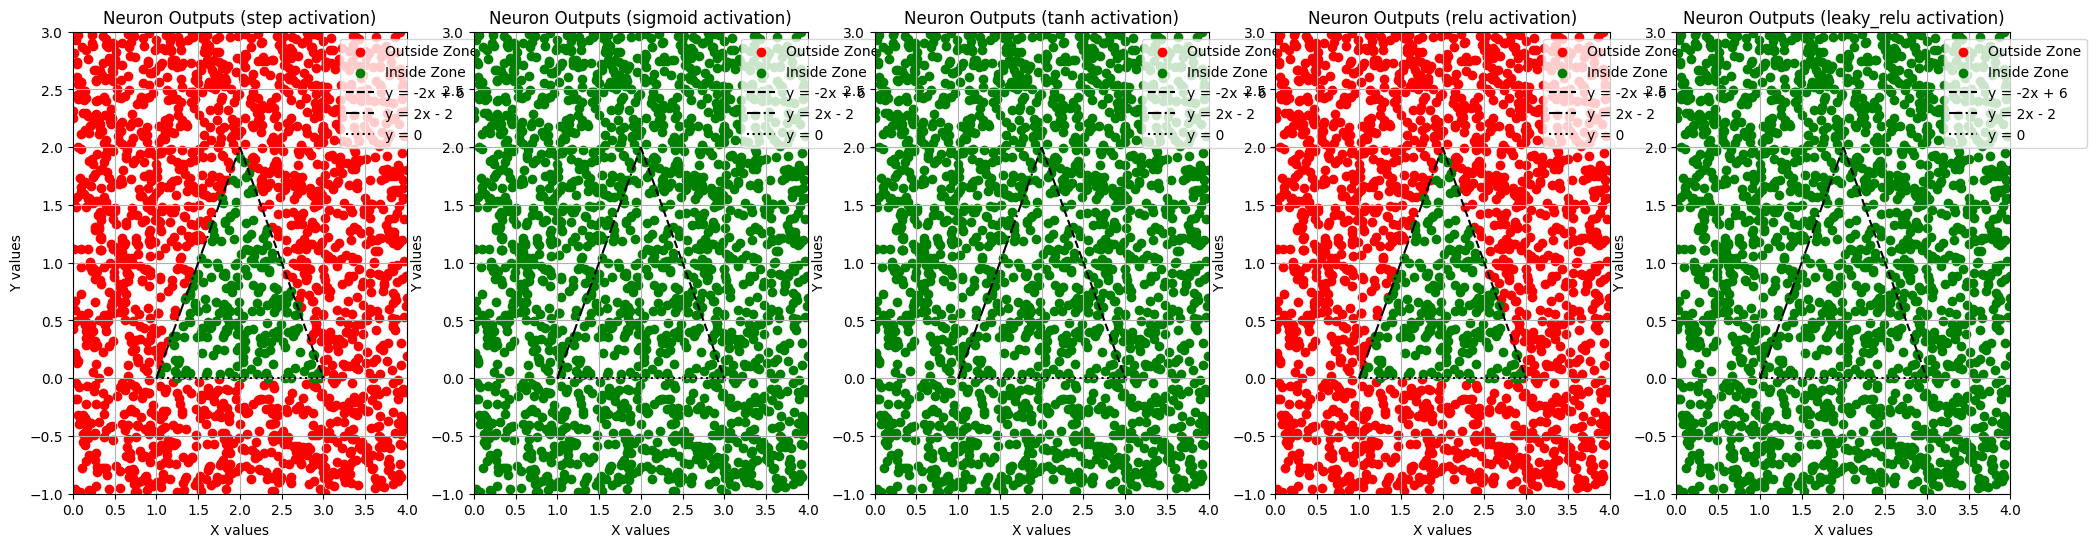

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define McCulloch-Pitts Neuron with different activation functions
class McCullochPittsNeuron:
    def __init__(self, weights, threshold, activation='step'):
        self.weights = weights
        self.threshold = threshold
        self.activation = activation

    def step_function(self, x):
        return 1 if x >= 0 else 0

    def sigmoid_function(self, x):
        return 1 / (1 + np.exp(-x))

    def tanh_function(self, x):
        return np.tanh(x)

    def relu_function(self, x):
        return np.maximum(0, x)

    def leaky_relu_function(self, x):
        return np.where(x > 0, x, x * 0.01)

    def model(self, X):
        net_input = np.dot(self.weights, X) + self.threshold
        if self.activation == 'step':
            return self.step_function(net_input)
        elif self.activation == 'sigmoid':
            return self.sigmoid_function(net_input)
        elif self.activation == 'tanh':
            return self.tanh_function(net_input)
        elif self.activation == 'relu':
            return self.relu_function(net_input)
        elif self.activation == 'leaky_relu':
            return self.leaky_relu_function(net_input)
        else:
            raise ValueError("Unknown activation function")

# Define function to determine if point is inside triangle using different activations
def is_point_in_triangle(x, y, activation='step'):
    neuron1 = McCullochPittsNeuron([-2, -1], 6, activation)
    neuron2 = McCullochPittsNeuron([2, -1], -2, activation)
    neuron3 = McCullochPittsNeuron([0, 1], 0, activation)

    zone1 = neuron1.model(np.array([x, y]))
    zone2 = neuron2.model(np.array([x, y]))
    zone3 = neuron3.model(np.array([x, y]))

    # Check if point is inside the triangle
    return zone1 and zone2 and zone3

# Generate random points
num_points = 2000
x_values = np.random.uniform(0, 4, num_points)
y_values = np.random.uniform(-1, 3, num_points)

# Helper function to classify points based on activation function
def classify_points(activation):
    red_points = []  # outside zone
    green_points = []  # inside zone

    for x, y in zip(x_values, y_values):
        if is_point_in_triangle(x, y, activation):
            green_points.append((x, y))
        else:
            red_points.append((x, y))

    return red_points, green_points

# Classify points using different activation functions
activations = ['step', 'sigmoid', 'tanh', 'relu', 'leaky_relu']
results = {activation: classify_points(activation) for activation in activations}

# Plotting
fig, axs = plt.subplots(1, 5, figsize=(25, 6))

for i, activation in enumerate(activations):
    red_points, green_points = results[activation]
    if red_points:
        red_x, red_y = zip(*red_points)
    else:
        red_x, red_y = [], []
    if green_points:
        green_x, green_y = zip(*green_points)
    else:
        green_x, green_y = [], []

    axs[i].scatter(red_x, red_y, color='red', label='Outside Zone')
    axs[i].scatter(green_x, green_y, color='green', label='Inside Zone')
    axs[i].set_xlabel('X values')
    axs[i].set_ylabel('Y values')
    axs[i].set_title(f'Neuron Outputs ({activation} activation)')

    # Plot decision boundaries
    axs[i].plot([2, 3], [2, 0], color='black', linestyle='--', label='y = -2x + 6')
    axs[i].plot([1, 2], [0, 2], color='black', linestyle='-.', label='y = 2x - 2')
    axs[i].plot([1, 3], [0, 0], color='black', linestyle=':', label='y = 0')

    axs[i].grid(True)
    axs[i].set_xlim(0, 4)
    axs[i].set_ylim(-1, 3)
    axs[i].legend(loc='upper right', bbox_to_anchor=(1.25, 1.0))

# Save plot as a PNG file
plt.savefig('decision_comparison.png', bbox_inches='tight')

# Show plot
plt.show()


# Q2

Q2-1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from scipy import stats
from IPython.display import clear_output

# Constants
M, N = 250, 200
np.random.seed(34)
my_ID_Number = 34
dataset_url = {
    'normal': 'https://engineering.case.edu/sites/default/files/99.mat',
    'faulty1': 'https://engineering.case.edu/sites/default/files/107.mat',
    'faulty2': 'https://engineering.case.edu/sites/default/files/120.mat',
    'faulty3': 'https://engineering.case.edu/sites/default/files/132.mat'
}

# Functions
def load_data(urls):
    data = {}
    for label, url in urls.items():
        !wget -q {url}  # Quiet mode, no output
        data[label] = loadmat(url.split('/')[-1])  # Load and return data
    return data

def organize_data(data, cols):
    all_matrices = {}
    for label, datasets in data.items():
        for col in cols[label]:
            mat = np.zeros((M, N))
            for j in range(M):
                try:
                    mat[j, :] = datasets[col][j:j+N].reshape(-1,)
                except Exception as e:
                    continue  # Handle case where window exceeds bounds of data
            all_matrices[f"{label}_{col}"] = mat
    return all_matrices

def extract_features(matrix):
    # Compute various statistical features from the matrix
    features = {
        'standard deviation': stats.tstd(matrix, axis=1),
        'peak': np.max(matrix, axis=1),
        'skewness': stats.skew(matrix, axis=1),
        'mean': np.mean(matrix, axis=1),
        'absolute mean': np.mean(np.abs(matrix), axis=1),
        'root mean square': np.sqrt(np.mean(np.square(matrix), axis=1)),
        'square root mean': np.square(np.mean(np.sqrt(np.abs(matrix)), axis=1)),
        'kurtosis': stats.kurtosis(matrix, axis=1),
        'crest factor': np.max(matrix, axis=1) / np.sqrt(np.mean(np.square(matrix), axis=1)),
        'clearance factor': np.max(matrix, axis=1) / np.square(np.mean(np.sqrt(np.abs(matrix)), axis=1)),
        'peak to peak': np.max(matrix, axis=1) - np.min(matrix, axis=1),
        'shape factor': np.sqrt(np.mean(np.square(matrix), axis=1)) / np.mean(np.abs(matrix), axis=1),
        'impact factor': np.sqrt(np.mean(np.square(matrix), axis=1)) / np.mean(np.abs(matrix), axis=1),
        'impulse factor': np.abs(np.mean(matrix, axis=1)) / np.mean(np.abs(matrix), axis=1)
    }
    return features


# Load all datasets
data = load_data(dataset_url)
cols = {key: list(val.keys())[-4:] for key, val in data.items()}

# Organize data into matrices
matrices = organize_data(data, cols)

# Extract features for each dataset and create dataframes
dfs = []
for label, matrix in matrices.items():
    features = extract_features(matrix)
    df = pd.DataFrame(features)
    df['label'] = 0 if 'normal' in label else 1
    dfs.append(df)

# Combine all dataframes
df = pd.concat(dfs, ignore_index=True)

# Split data into training, validation, and test sets
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# First split to separate training and the remaining data
x_train, x_temp, y_train, y_temp = train_test_split(
    df.drop('label', axis=1).values,
    df['label'].values,
    test_size=1 - train_ratio,
    random_state=34,
    shuffle=True
)

# Second split to separate validation and test data
x_val, x_test, y_val, y_test = train_test_split(
    x_temp,
    y_temp,
    test_size=test_ratio / (test_ratio + validation_ratio),
    random_state=34,
    shuffle=True
)

# Standardize data
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)


<ipython-input-1-b2fbc27ec387>:48: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'skewness': stats.skew(matrix, axis=1),
<ipython-input-1-b2fbc27ec387>:53: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'kurtosis': stats.kurtosis(matrix, axis=1),
<ipython-input-1-b2fbc27ec387>:54: RuntimeWarning: invalid value encountered in divide
  'crest factor': np.max(matrix, axis=1) / np.sqrt(np.mean(np.square(matrix), axis=1)),
<ipython-input-1-b2fbc27ec387>:55: RuntimeWarning: invalid value encountered in divide
  'clearance factor': np.max(matrix, axis=1) / np.square(np.mean(np.sqrt(np.abs(matrix)), axis=1)),
<ipython-input-1-b2fbc27ec387>:57: RuntimeWarning: invalid value encountered in divide
  'shape factor': np.sqrt(np.mean(np.square(matrix)

Q2-2-sgd with log loss

<ipython-input-11-6015e3e617b1>:51: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'skewness': stats.skew(matrix, axis=1),
<ipython-input-11-6015e3e617b1>:56: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'kurtosis': stats.kurtosis(matrix, axis=1),
<ipython-input-11-6015e3e617b1>:57: RuntimeWarning: invalid value encountered in divide
  'crest factor': np.max(matrix, axis=1) / np.sqrt(np.mean(np.square(matrix), axis=1)),
<ipython-input-11-6015e3e617b1>:58: RuntimeWarning: invalid value encountered in divide
  'clearance factor': np.max(matrix, axis=1) / np.square(np.mean(np.sqrt(np.abs(matrix)), axis=1)),
<ipython-input-11-6015e3e617b1>:60: RuntimeWarning: invalid value encountered in divide
  'shape factor': np.sqrt(np.mean(np.square(ma

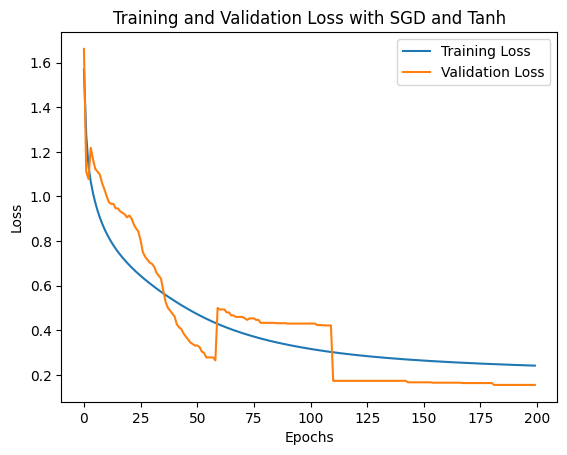

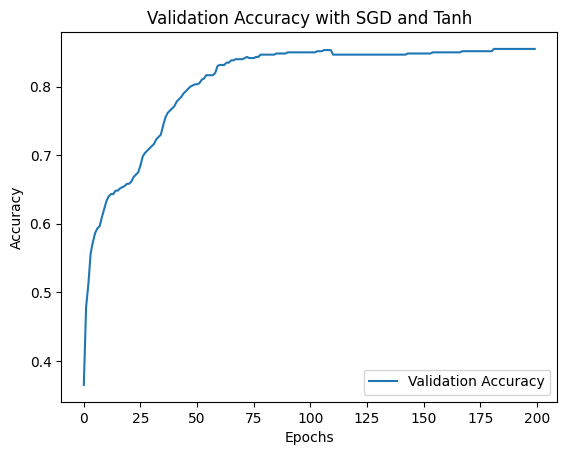

Classification Report for Test Data with SGD and Tanh:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      0.77      0.87       110
           2       0.63      1.00      0.77        90
           3       1.00      0.73      0.84       104

    accuracy                           0.87       400
   macro avg       0.91      0.88      0.87       400
weighted avg       0.92      0.87      0.87       400

Confusion Matrix for Test Data with SGD and Tanh:
[[96  0  0  0]
 [ 0 85 25  0]
 [ 0  0 90  0]
 [ 0  0 28 76]]


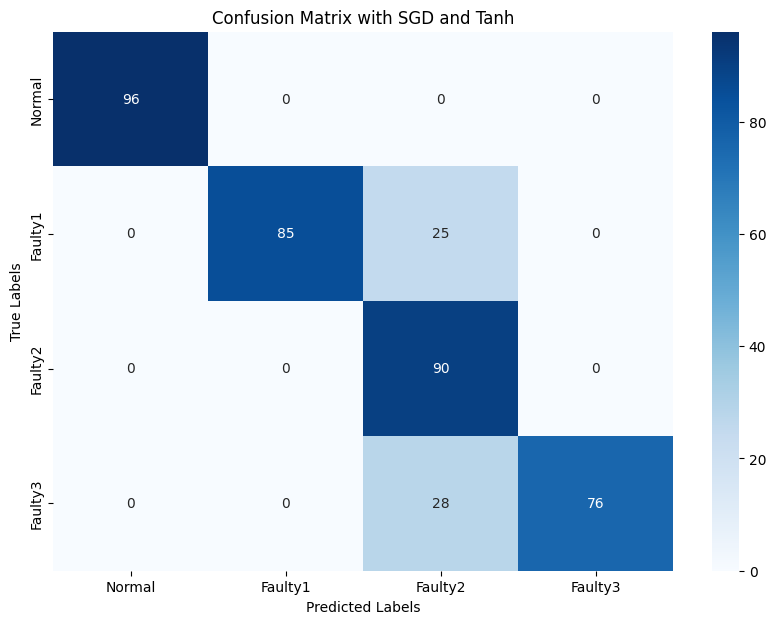

Final Train Accuracy with SGD and Tanh: 0.8763333333333333
Final Validation Accuracy with SGD and Tanh: 0.855
Test Accuracy with SGD and Tanh: 0.8675


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from scipy import stats
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
import seaborn as sns

# Constants
M, N = 250, 200
np.random.seed(25)
my_ID_Number = 34
dataset_url = {
    'normal': 'https://engineering.case.edu/sites/default/files/99.mat',
    'faulty1': 'https://engineering.case.edu/sites/default/files/107.mat',
    'faulty2': 'https://engineering.case.edu/sites/default/files/120.mat',
    'faulty3': 'https://engineering.case.edu/sites/default/files/132.mat'
}

# Functions
def load_data(urls):
    data = {}
    for label, url in urls.items():
        !wget -q {url}  # Quiet mode, no output
        data[label] = loadmat(url.split('/')[-1])  # Load and return data
    return data

def organize_data(data, cols):
    all_matrices = {}
    for label, datasets in data.items():
        for col in cols[label]:
            mat = np.zeros((M, N))
            for j in range(M):
                try:
                    mat[j, :] = datasets[col][j:j+N].reshape(-1,)
                except Exception as e:
                    continue  # Handle case where window exceeds bounds of data
            all_matrices[f"{label}_{col}"] = mat
    return all_matrices

def extract_features(matrix):
    # Compute various statistical features from the matrix
    features = {
        'standard deviation': stats.tstd(matrix, axis=1),
        'peak': np.max(matrix, axis=1),
        'skewness': stats.skew(matrix, axis=1),
        'mean': np.mean(matrix, axis=1),
        'absolute mean': np.mean(np.abs(matrix), axis=1),
        'root mean square': np.sqrt(np.mean(np.square(matrix), axis=1)),
        'square root mean': np.square(np.mean(np.sqrt(np.abs(matrix)), axis=1)),
        'kurtosis': stats.kurtosis(matrix, axis=1),
        'crest factor': np.max(matrix, axis=1) / np.sqrt(np.mean(np.square(matrix), axis=1)),
        'clearance factor': np.max(matrix, axis=1) / np.square(np.mean(np.sqrt(np.abs(matrix)), axis=1)),
        'peak to peak': np.max(matrix, axis=1) - np.min(matrix, axis=1),
        'shape factor': np.sqrt(np.mean(np.square(matrix), axis=1)) / np.mean(np.abs(matrix), axis=1),
        'impact factor': np.sqrt(np.mean(np.square(matrix), axis=1)) / np.mean(np.abs(matrix), axis=1),
        'impulse factor': np.abs(np.mean(matrix, axis=1)) / np.mean(np.abs(matrix), axis=1)
    }
    return features

# Load all datasets
data = load_data(dataset_url)
cols = {key: list(val.keys())[-4:] for key, val in data.items()}

# Organize data into matrices
matrices = organize_data(data, cols)

# Extract features for each dataset and create dataframes
dfs = []
for label, matrix in matrices.items():
    features = extract_features(matrix)
    df = pd.DataFrame(features)
    if 'normal' in label:
        df['label'] = 0
    elif 'faulty1' in label:
        df['label'] = 1
    elif 'faulty2' in label:
        df['label'] = 2
    elif 'faulty3' in label:
        df['label'] = 3
    dfs.append(df)

# Combine all dataframes
df = pd.concat(dfs, ignore_index=True)

# Split data into training, validation, and test sets
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# First split to separate training and the remaining data
x_train, x_temp, y_train, y_temp = train_test_split(
    df.drop('label', axis=1).values,
    df['label'].values,
    test_size=1 - train_ratio,
    random_state=34,
    shuffle=True
)

# Second split to separate validation and test data
x_val, x_test, y_val, y_test = train_test_split(
    x_temp,
    y_temp,
    test_size=test_ratio / (test_ratio + validation_ratio),
    random_state=34,
    shuffle=True
)

# Standardize data
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
x_train_scaled_imputed = imputer.fit_transform(x_train_scaled)
x_val_scaled_imputed = imputer.transform(x_val_scaled)
x_test_scaled_imputed = imputer.transform(x_test_scaled)

# Create and train the MLP model manually with new optimizer and loss function
mlp_model = MLPClassifier(hidden_layer_sizes=(10, 7), activation='tanh', solver='sgd', learning_rate_init=0.01, max_iter=1, warm_start=True, random_state=34)

train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(200):  # Train for 50 epochs
    mlp_model.fit(x_train_scaled_imputed, y_train)
    train_losses.append(mlp_model.loss_)

    # Calculate validation loss and accuracy
    val_preds = mlp_model.predict(x_val_scaled_imputed)
    val_accuracy = accuracy_score(y_val, val_preds)
    val_loss = np.mean((val_preds - y_val) ** 2)

    val_accuracies.append(val_accuracy)
    val_losses.append(val_loss)

# Plotting training and validation loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss with SGD and Tanh')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting validation accuracy
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Validation Accuracy with SGD and Tanh')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Predictions on test set
test_preds = mlp_model.predict(x_test_scaled_imputed)

# Classification report
print("Classification Report for Test Data with SGD and Tanh:")
print(classification_report(y_test, test_preds))

# Confusion matrix
cm = confusion_matrix(y_test, test_preds)
print("Confusion Matrix for Test Data with SGD and Tanh:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Faulty1', 'Faulty2', 'Faulty3'], yticklabels=['Normal', 'Faulty1', 'Faulty2', 'Faulty3'])
plt.title('Confusion Matrix with SGD and Tanh')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Analysis
print("Final Train Accuracy with SGD and Tanh:", accuracy_score(y_train, mlp_model.predict(x_train_scaled_imputed)))
print("Final Validation Accuracy with SGD and Tanh:", accuracy_score(y_val, mlp_model.predict(x_val_scaled_imputed)))
print("Test Accuracy with SGD and Tanh:", accuracy_score(y_test, test_preds))


Q2-2-adam with log loss

<ipython-input-18-0aec5ebba3d3>:51: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'skewness': stats.skew(matrix, axis=1),
<ipython-input-18-0aec5ebba3d3>:56: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'kurtosis': stats.kurtosis(matrix, axis=1),
<ipython-input-18-0aec5ebba3d3>:57: RuntimeWarning: invalid value encountered in divide
  'crest factor': np.max(matrix, axis=1) / np.sqrt(np.mean(np.square(matrix), axis=1)),
<ipython-input-18-0aec5ebba3d3>:58: RuntimeWarning: invalid value encountered in divide
  'clearance factor': np.max(matrix, axis=1) / np.square(np.mean(np.sqrt(np.abs(matrix)), axis=1)),
<ipython-input-18-0aec5ebba3d3>:60: RuntimeWarning: invalid value encountered in divide
  'shape factor': np.sqrt(np.mean(np.square(ma

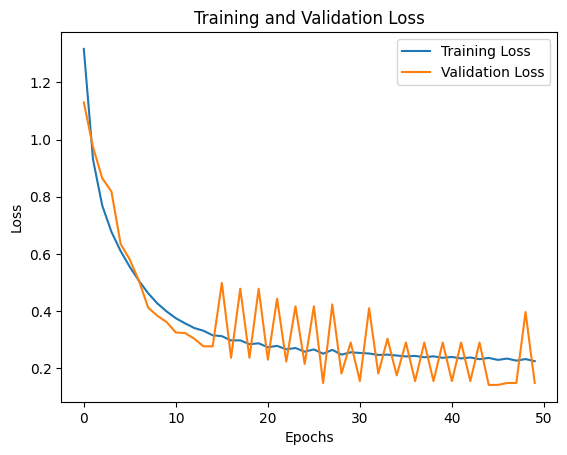

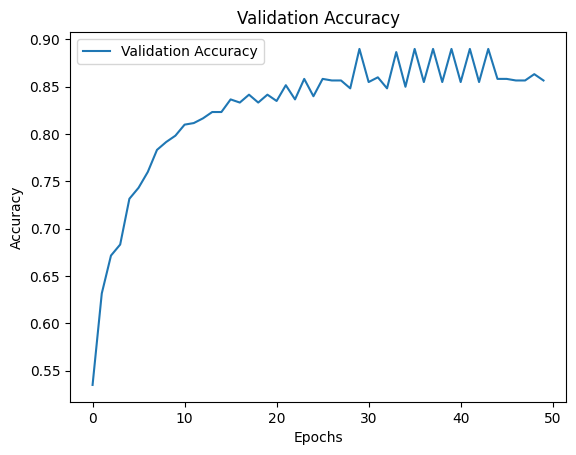

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      0.77      0.87       110
           2       0.63      1.00      0.77        90
           3       1.00      0.73      0.84       104

    accuracy                           0.87       400
   macro avg       0.91      0.88      0.87       400
weighted avg       0.92      0.87      0.87       400

Confusion Matrix for Test Data:
[[96  0  0  0]
 [ 0 85 25  0]
 [ 0  0 90  0]
 [ 0  0 28 76]]


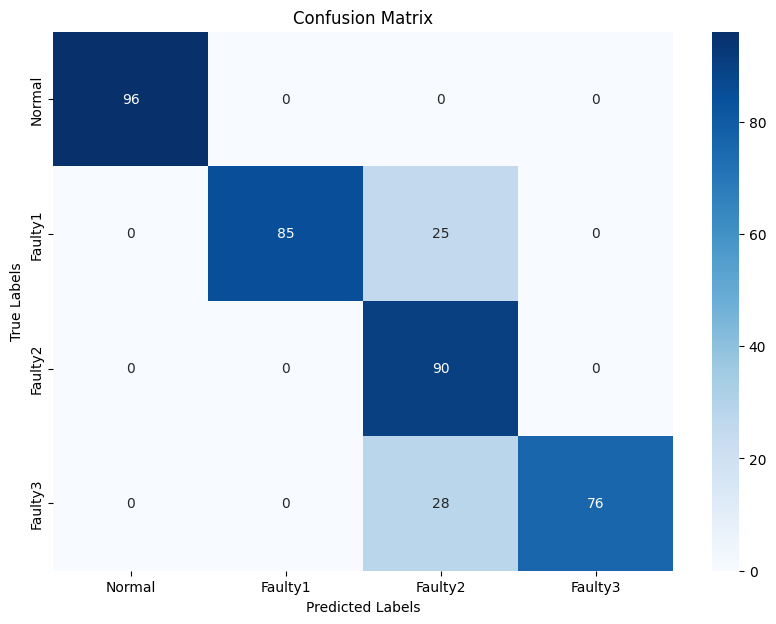

Final Train Accuracy: 0.8786666666666667
Final Validation Accuracy: 0.8566666666666667
Test Accuracy: 0.8675


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from scipy import stats
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
import seaborn as sns

# Constants
M, N = 250, 200
np.random.seed(25)
my_ID_Number = 34
dataset_url = {
    'normal': 'https://engineering.case.edu/sites/default/files/99.mat',
    'faulty1': 'https://engineering.case.edu/sites/default/files/107.mat',
    'faulty2': 'https://engineering.case.edu/sites/default/files/120.mat',
    'faulty3': 'https://engineering.case.edu/sites/default/files/132.mat'
}

# Functions
def load_data(urls):
    data = {}
    for label, url in urls.items():
        !wget -q {url}  # Quiet mode, no output
        data[label] = loadmat(url.split('/')[-1])  # Load and return data
    return data

def organize_data(data, cols):
    all_matrices = {}
    for label, datasets in data.items():
        for col in cols[label]:
            mat = np.zeros((M, N))
            for j in range(M):
                try:
                    mat[j, :] = datasets[col][j:j+N].reshape(-1,)
                except Exception as e:
                    continue  # Handle case where window exceeds bounds of data
            all_matrices[f"{label}_{col}"] = mat
    return all_matrices

def extract_features(matrix):
    # Compute various statistical features from the matrix
    features = {
        'standard deviation': stats.tstd(matrix, axis=1),
        'peak': np.max(matrix, axis=1),
        'skewness': stats.skew(matrix, axis=1),
        'mean': np.mean(matrix, axis=1),
        'absolute mean': np.mean(np.abs(matrix), axis=1),
        'root mean square': np.sqrt(np.mean(np.square(matrix), axis=1)),
        'square root mean': np.square(np.mean(np.sqrt(np.abs(matrix)), axis=1)),
        'kurtosis': stats.kurtosis(matrix, axis=1),
        'crest factor': np.max(matrix, axis=1) / np.sqrt(np.mean(np.square(matrix), axis=1)),
        'clearance factor': np.max(matrix, axis=1) / np.square(np.mean(np.sqrt(np.abs(matrix)), axis=1)),
        'peak to peak': np.max(matrix, axis=1) - np.min(matrix, axis=1),
        'shape factor': np.sqrt(np.mean(np.square(matrix), axis=1)) / np.mean(np.abs(matrix), axis=1),
        'impact factor': np.sqrt(np.mean(np.square(matrix), axis=1)) / np.mean(np.abs(matrix), axis=1),
        'impulse factor': np.abs(np.mean(matrix, axis=1)) / np.mean(np.abs(matrix), axis=1)
    }
    return features

# Load all datasets
data = load_data(dataset_url)
cols = {key: list(val.keys())[-4:] for key, val in data.items()}

# Organize data into matrices
matrices = organize_data(data, cols)

# Extract features for each dataset and create dataframes
dfs = []
for label, matrix in matrices.items():
    features = extract_features(matrix)
    df = pd.DataFrame(features)
    if 'normal' in label:
        df['label'] = 0
    elif 'faulty1' in label:
        df['label'] = 1
    elif 'faulty2' in label:
        df['label'] = 2
    elif 'faulty3' in label:
        df['label'] = 3
    dfs.append(df)

# Combine all dataframes
df = pd.concat(dfs, ignore_index=True)

# Split data into training, validation, and test sets
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# First split to separate training and the remaining data
x_train, x_temp, y_train, y_temp = train_test_split(
    df.drop('label', axis=1).values,
    df['label'].values,
    test_size=1 - train_ratio,
    random_state=34,
    shuffle=True
)

# Second split to separate validation and test data
x_val, x_test, y_val, y_test = train_test_split(
    x_temp,
    y_temp,
    test_size=test_ratio / (test_ratio + validation_ratio),
    random_state=34,
    shuffle=True
)

# Standardize data
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
x_train_scaled_imputed = imputer.fit_transform(x_train_scaled)
x_val_scaled_imputed = imputer.transform(x_val_scaled)
x_test_scaled_imputed = imputer.transform(x_test_scaled)

# Create and train the MLP model manually
mlp_model = MLPClassifier(hidden_layer_sizes=(10, 7), activation='tanh', solver='adam',learning_rate_init=0.01, max_iter=1, warm_start=True, random_state=34)

train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(50):  # Train for 50 epochs
    mlp_model.fit(x_train_scaled_imputed, y_train)
    train_losses.append(mlp_model.loss_)

    # Calculate validation loss and accuracy
    val_preds = mlp_model.predict(x_val_scaled_imputed)
    val_accuracy = accuracy_score(y_val, val_preds)
    val_loss = np.mean((val_preds - y_val) ** 2)

    val_accuracies.append(val_accuracy)
    val_losses.append(val_loss)

# Plotting training and validation loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting validation accuracy
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Predictions on test set
test_preds = mlp_model.predict(x_test_scaled_imputed)

# Classification report
print("Classification Report for Test Data:")
print(classification_report(y_test, test_preds))

# Confusion matrix
cm = confusion_matrix(y_test, test_preds)
print("Confusion Matrix for Test Data:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Faulty1', 'Faulty2', 'Faulty3'], yticklabels=['Normal', 'Faulty1', 'Faulty2', 'Faulty3'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Analysis
print("Final Train Accuracy:", accuracy_score(y_train, mlp_model.predict(x_train_scaled_imputed)))
print("Final Validation Accuracy:", accuracy_score(y_val, mlp_model.predict(x_val_scaled_imputed)))
print("Test Accuracy:", accuracy_score(y_test, test_preds))


Q2-2-adam with CrossEntropyLoss

<ipython-input-3-bed341baaf1f>:52: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'skewness': stats.skew(matrix, axis=1),
<ipython-input-3-bed341baaf1f>:57: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'kurtosis': stats.kurtosis(matrix, axis=1),
<ipython-input-3-bed341baaf1f>:58: RuntimeWarning: invalid value encountered in divide
  'crest factor': np.max(matrix, axis=1) / np.sqrt(np.mean(np.square(matrix), axis=1)),
<ipython-input-3-bed341baaf1f>:59: RuntimeWarning: invalid value encountered in divide
  'clearance factor': np.max(matrix, axis=1) / np.square(np.mean(np.sqrt(np.abs(matrix)), axis=1)),
<ipython-input-3-bed341baaf1f>:61: RuntimeWarning: invalid value encountered in divide
  'shape factor': np.sqrt(np.mean(np.square(matrix)

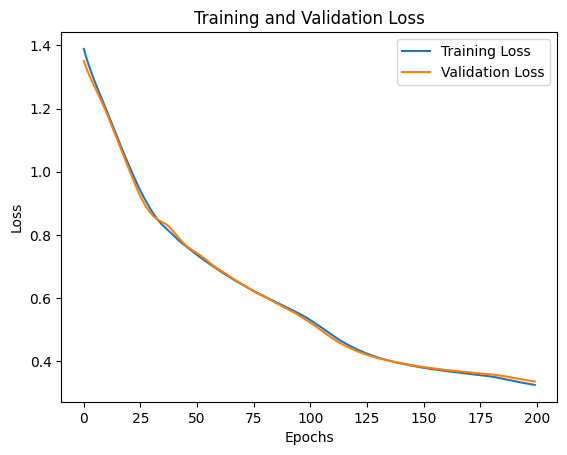

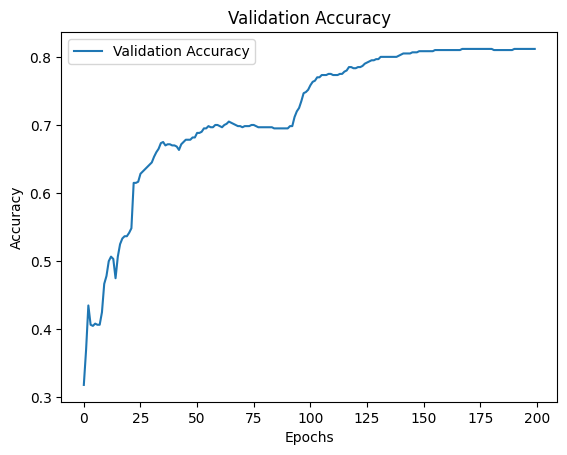

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        96
           1       0.99      0.77      0.87       110
           2       0.60      0.90      0.72        90
           3       0.99      0.72      0.83       104

    accuracy                           0.84       400
   macro avg       0.88      0.85      0.85       400
weighted avg       0.89      0.84      0.85       400

Confusion Matrix for Test Data:
[[96  0  0  0]
 [ 0 85 25  0]
 [ 8  0 81  1]
 [ 0  1 28 75]]


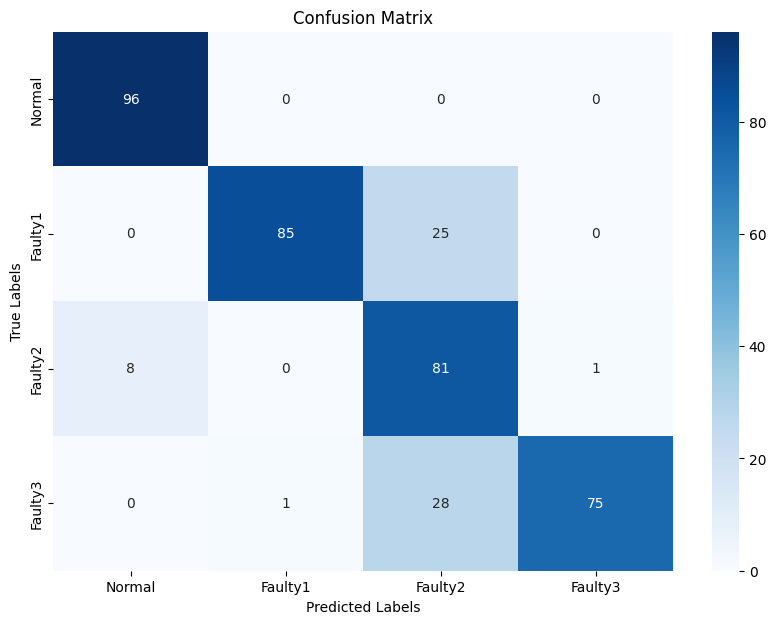

Final Train Accuracy: 0.832
Final Validation Accuracy: 0.8116666666666666
Test Accuracy: 0.8425


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from scipy import stats  # Import scipy.stats

# Constants
M, N = 250, 200
np.random.seed(25)
my_ID_Number = 34
dataset_url = {
    'normal': 'https://engineering.case.edu/sites/default/files/99.mat',
    'faulty1': 'https://engineering.case.edu/sites/default/files/107.mat',
    'faulty2': 'https://engineering.case.edu/sites/default/files/120.mat',
    'faulty3': 'https://engineering.case.edu/sites/default/files/132.mat'
}

# Functions
def load_data(urls):
    data = {}
    for label, url in urls.items():
        !wget -q {url}  # Quiet mode, no output
        data[label] = loadmat(url.split('/')[-1])  # Load and return data
    return data

def organize_data(data, cols):
    all_matrices = {}
    for label, datasets in data.items():
        for col in cols[label]:
            mat = np.zeros((M, N))
            for j in range(M):
                try:
                    mat[j, :] = datasets[col][j:j+N].reshape(-1,)
                except Exception as e:
                    continue  # Handle case where window exceeds bounds of data
            all_matrices[f"{label}_{col}"] = mat
    return all_matrices

def extract_features(matrix):
    # Compute various statistical features from the matrix
    features = {
        'standard deviation': stats.tstd(matrix, axis=1),
        'peak': np.max(matrix, axis=1),
        'skewness': stats.skew(matrix, axis=1),
        'mean': np.mean(matrix, axis=1),
        'absolute mean': np.mean(np.abs(matrix), axis=1),
        'root mean square': np.sqrt(np.mean(np.square(matrix), axis=1)),
        'square root mean': np.square(np.mean(np.sqrt(np.abs(matrix)), axis=1)),
        'kurtosis': stats.kurtosis(matrix, axis=1),
        'crest factor': np.max(matrix, axis=1) / np.sqrt(np.mean(np.square(matrix), axis=1)),
        'clearance factor': np.max(matrix, axis=1) / np.square(np.mean(np.sqrt(np.abs(matrix)), axis=1)),
        'peak to peak': np.max(matrix, axis=1) - np.min(matrix, axis=1),
        'shape factor': np.sqrt(np.mean(np.square(matrix), axis=1)) / np.mean(np.abs(matrix), axis=1),
        'impact factor': np.sqrt(np.mean(np.square(matrix), axis=1)) / np.mean(np.abs(matrix), axis=1),
        'impulse factor': np.abs(np.mean(matrix, axis=1)) / np.mean(np.abs(matrix), axis=1)
    }
    return features

# Load all datasets
data = load_data(dataset_url)
cols = {key: list(val.keys())[-4:] for key, val in data.items()}

# Organize data into matrices
matrices = organize_data(data, cols)

# Extract features for each dataset and create dataframes
dfs = []
for label, matrix in matrices.items():
    features = extract_features(matrix)
    df = pd.DataFrame(features)
    if 'normal' in label:
        df['label'] = 0
    elif 'faulty1' in label:
        df['label'] = 1
    elif 'faulty2' in label:
        df['label'] = 2
    elif 'faulty3' in label:
        df['label'] = 3
    dfs.append(df)

# Combine all dataframes
df = pd.concat(dfs, ignore_index=True)

# Split data into training, validation, and test sets
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# First split to separate training and the remaining data
x_train, x_temp, y_train, y_temp = train_test_split(
    df.drop('label', axis=1).values,
    df['label'].values,
    test_size=1 - train_ratio,
    random_state=34,
    shuffle=True
)

# Second split to separate validation and test data
x_val, x_test, y_val, y_test = train_test_split(
    x_temp,
    y_temp,
    test_size=test_ratio / (test_ratio + validation_ratio),
    random_state=34,
    shuffle=True
)

# Standardize data
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
x_train_scaled_imputed = imputer.fit_transform(x_train_scaled)
x_val_scaled_imputed = imputer.transform(x_val_scaled)
x_test_scaled_imputed = imputer.transform(x_test_scaled)

# Convert data to PyTorch tensors
x_train_tensor = torch.tensor(x_train_scaled_imputed, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
x_val_tensor = torch.tensor(x_val_scaled_imputed, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
x_test_tensor = torch.tensor(x_test_scaled_imputed, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Define the neural network model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(x_train_tensor.shape[1], 10)
        self.fc2 = nn.Linear(10, 7)
        self.fc3 = nn.Linear(7, 4)
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.tanh(self.fc1(x))
        x = self.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model, loss function, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()  # This is the default loss function for classification
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 200
train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_outputs = model(x_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_losses.append(val_loss.item())

        _, val_preds = torch.max(val_outputs, 1)
        val_accuracy = accuracy_score(y_val_tensor.numpy(), val_preds.numpy())
        val_accuracies.append(val_accuracy)

# Plotting training and validation loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting validation accuracy
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Predictions on test set
model.eval()
with torch.no_grad():
    test_outputs = model(x_test_tensor)
    _, test_preds = torch.max(test_outputs, 1)

# Classification report
print("Classification Report for Test Data:")
print(classification_report(y_test_tensor.numpy(), test_preds.numpy()))

# Confusion matrix
cm = confusion_matrix(y_test_tensor.numpy(), test_preds.numpy())
print("Confusion Matrix for Test Data:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Faulty1', 'Faulty2', 'Faulty3'], yticklabels=['Normal', 'Faulty1', 'Faulty2', 'Faulty3'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Analysis
train_preds = model(x_train_tensor)
_, train_preds = torch.max(train_preds, 1)
print("Final Train Accuracy:", accuracy_score(y_train_tensor.numpy(), train_preds.numpy()))

val_preds = model(x_val_tensor)
_, val_preds = torch.max(val_preds, 1)
print("Final Validation Accuracy:", accuracy_score(y_val_tensor.numpy(), val_preds.numpy()))

print("Test Accuracy:", accuracy_score(y_test_tensor.numpy(), test_preds.numpy()))


Q2-2-momentum with log loss

<ipython-input-19-07a2b31749b6>:50: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'skewness': stats.skew(matrix, axis=1),
<ipython-input-19-07a2b31749b6>:55: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'kurtosis': stats.kurtosis(matrix, axis=1),
<ipython-input-19-07a2b31749b6>:56: RuntimeWarning: invalid value encountered in divide
  'crest factor': np.max(matrix, axis=1) / np.sqrt(np.mean(np.square(matrix), axis=1)),
<ipython-input-19-07a2b31749b6>:57: RuntimeWarning: invalid value encountered in divide
  'clearance factor': np.max(matrix, axis=1) / np.square(np.mean(np.sqrt(np.abs(matrix)), axis=1)),
<ipython-input-19-07a2b31749b6>:59: RuntimeWarning: invalid value encountered in divide
  'shape factor': np.sqrt(np.mean(np.square(ma

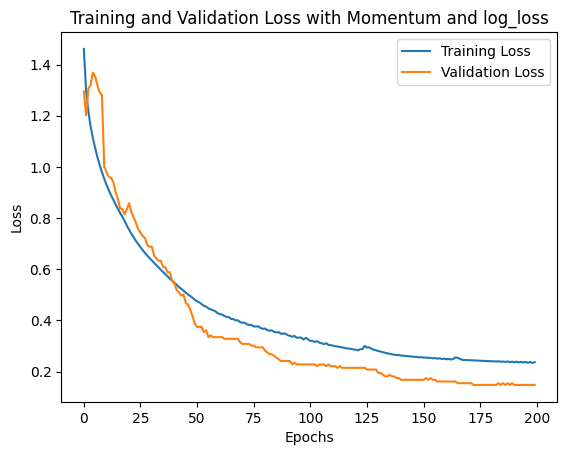

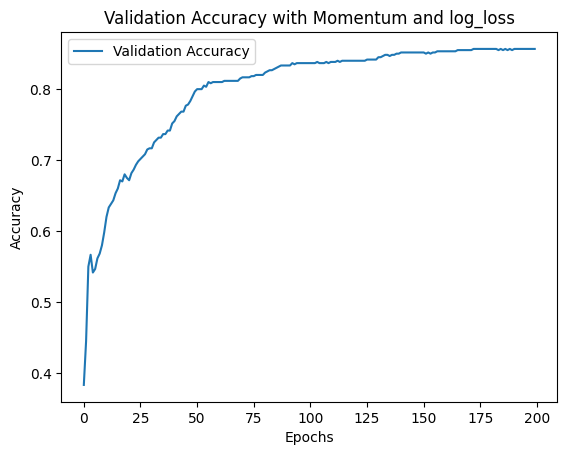

Classification Report for Test Data with Momentum and log_loss:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        96
           1       1.00      0.77      0.87       110
           2       0.62      1.00      0.77        90
           3       1.00      0.73      0.84       104

    accuracy                           0.86       400
   macro avg       0.91      0.87      0.87       400
weighted avg       0.92      0.86      0.87       400

Confusion Matrix for Test Data with Momentum and log_loss:
[[95  0  1  0]
 [ 0 85 25  0]
 [ 0  0 90  0]
 [ 0  0 28 76]]


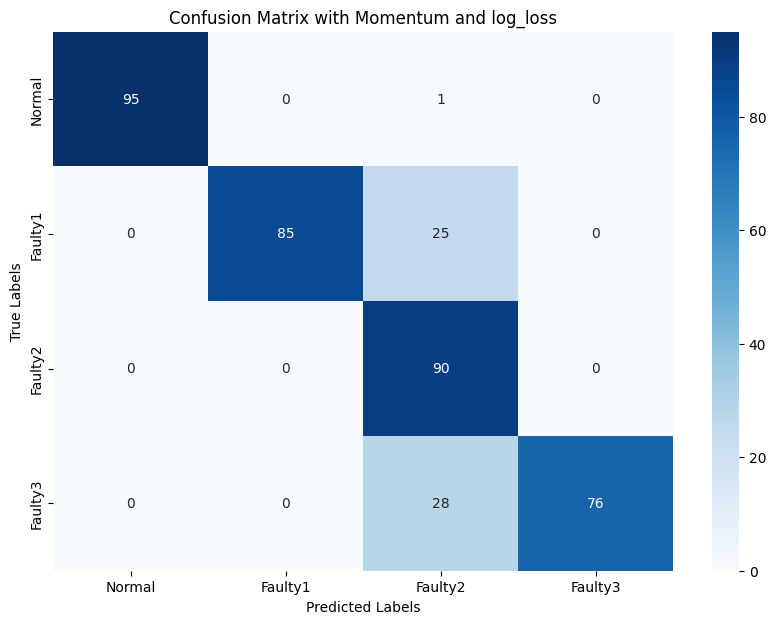

Final Train Accuracy with Momentum and log_loss: 0.878
Final Validation Accuracy with Momentum and log_loss: 0.8566666666666667
Test Accuracy with Momentum and log_loss: 0.865


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
import seaborn as sns

# Constants
M, N = 250, 200
np.random.seed(25)
my_ID_Number = 34
dataset_url = {
    'normal': 'https://engineering.case.edu/sites/default/files/99.mat',
    'faulty1': 'https://engineering.case.edu/sites/default/files/107.mat',
    'faulty2': 'https://engineering.case.edu/sites/default/files/120.mat',
    'faulty3': 'https://engineering.case.edu/sites/default/files/132.mat'
}

# Functions
def load_data(urls):
    data = {}
    for label, url in urls.items():
        !wget -q {url}  # Quiet mode, no output
        data[label] = loadmat(url.split('/')[-1])  # Load and return data
    return data

def organize_data(data, cols):
    all_matrices = {}
    for label, datasets in data.items():
        for col in cols[label]:
            mat = np.zeros((M, N))
            for j in range(M):
                try:
                    mat[j, :] = datasets[col][j:j+N].reshape(-1,)
                except Exception as e:
                    continue  # Handle case where window exceeds bounds of data
            all_matrices[f"{label}_{col}"] = mat
    return all_matrices

def extract_features(matrix):
    # Compute various statistical features from the matrix
    features = {
        'standard deviation': stats.tstd(matrix, axis=1),
        'peak': np.max(matrix, axis=1),
        'skewness': stats.skew(matrix, axis=1),
        'mean': np.mean(matrix, axis=1),
        'absolute mean': np.mean(np.abs(matrix), axis=1),
        'root mean square': np.sqrt(np.mean(np.square(matrix), axis=1)),
        'square root mean': np.square(np.mean(np.sqrt(np.abs(matrix)), axis=1)),
        'kurtosis': stats.kurtosis(matrix, axis=1),
        'crest factor': np.max(matrix, axis=1) / np.sqrt(np.mean(np.square(matrix), axis=1)),
        'clearance factor': np.max(matrix, axis=1) / np.square(np.mean(np.sqrt(np.abs(matrix)), axis=1)),
        'peak to peak': np.max(matrix, axis=1) - np.min(matrix, axis=1),
        'shape factor': np.sqrt(np.mean(np.square(matrix), axis=1)) / np.mean(np.abs(matrix), axis=1),
        'impact factor': np.sqrt(np.mean(np.square(matrix), axis=1)) / np.mean(np.abs(matrix), axis=1),
        'impulse factor': np.abs(np.mean(matrix, axis=1)) / np.mean(np.abs(matrix), axis=1)
    }
    return features

# Load all datasets
data = load_data(dataset_url)
cols = {key: list(val.keys())[-4:] for key, val in data.items()}

# Organize data into matrices
matrices = organize_data(data, cols)

# Extract features for each dataset and create dataframes
dfs = []
for label, matrix in matrices.items():
    features = extract_features(matrix)
    df = pd.DataFrame(features)
    if 'normal' in label:
        df['label'] = 0
    elif 'faulty1' in label:
        df['label'] = 1
    elif 'faulty2' in label:
        df['label'] = 2
    elif 'faulty3' in label:
        df['label'] = 3
    dfs.append(df)

# Combine all dataframes
df = pd.concat(dfs, ignore_index=True)

# Split data into training, validation, and test sets
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# First split to separate training and the remaining data
x_train, x_temp, y_train, y_temp = train_test_split(
    df.drop('label', axis=1).values,
    df['label'].values,
    test_size=1 - train_ratio,
    random_state=34,
    shuffle=True
)

# Second split to separate validation and test data
x_val, x_test, y_val, y_test = train_test_split(
    x_temp,
    y_temp,
    test_size=test_ratio / (test_ratio + validation_ratio),
    random_state=34,
    shuffle=True
)

# Standardize data
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
x_train_scaled_imputed = imputer.fit_transform(x_train_scaled)
x_val_scaled_imputed = imputer.transform(x_val_scaled)
x_test_scaled_imputed = imputer.transform(x_test_scaled)

# Create and train the MLP model manually with Momentum optimizer
mlp_model = MLPClassifier(hidden_layer_sizes=(10, 7), activation='relu', solver='sgd', learning_rate_init=0.01, momentum=0.98, max_iter=1, warm_start=True, random_state=34)

train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(200):  # Train for 50 epochs
    mlp_model.fit(x_train_scaled_imputed, y_train)
    train_losses.append(mlp_model.loss_)

    # Calculate validation loss and accuracy
    val_preds = mlp_model.predict(x_val_scaled_imputed)
    val_accuracy = accuracy_score(y_val, val_preds)
    val_loss = np.mean((val_preds - y_val) ** 2)

    val_accuracies.append(val_accuracy)
    val_losses.append(val_loss)

# Plotting training and validation loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss with Momentum and log_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting validation accuracy
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Validation Accuracy with Momentum and log_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Predictions on test set
test_preds = mlp_model.predict(x_test_scaled_imputed)

# Classification report
print("Classification Report for Test Data with Momentum and log_loss:")
print(classification_report(y_test, test_preds))

# Confusion matrix
cm = confusion_matrix(y_test, test_preds)
print("Confusion Matrix for Test Data with Momentum and log_loss:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Faulty1', 'Faulty2', 'Faulty3'], yticklabels=['Normal', 'Faulty1', 'Faulty2', 'Faulty3'])
plt.title('Confusion Matrix with Momentum and log_loss')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Analysis
print("Final Train Accuracy with Momentum and log_loss:", accuracy_score(y_train, mlp_model.predict(x_train_scaled_imputed)))
print("Final Validation Accuracy with Momentum and log_loss:", accuracy_score(y_val, mlp_model.predict(x_val_scaled_imputed)))
print("Test Accuracy with Momentum and log_loss:", accuracy_score(y_test, test_preds))


Q2-2-momentum with CROSSENTROPYLOSS

<ipython-input-1-c2554cac450c>:52: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'skewness': stats.skew(matrix, axis=1),
<ipython-input-1-c2554cac450c>:57: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'kurtosis': stats.kurtosis(matrix, axis=1),
<ipython-input-1-c2554cac450c>:58: RuntimeWarning: invalid value encountered in divide
  'crest factor': np.max(matrix, axis=1) / np.sqrt(np.mean(np.square(matrix), axis=1)),
<ipython-input-1-c2554cac450c>:59: RuntimeWarning: invalid value encountered in divide
  'clearance factor': np.max(matrix, axis=1) / np.square(np.mean(np.sqrt(np.abs(matrix)), axis=1)),
<ipython-input-1-c2554cac450c>:61: RuntimeWarning: invalid value encountered in divide
  'shape factor': np.sqrt(np.mean(np.square(matrix)

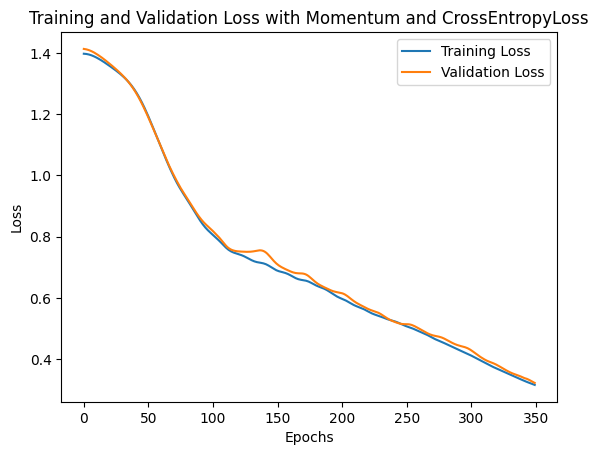

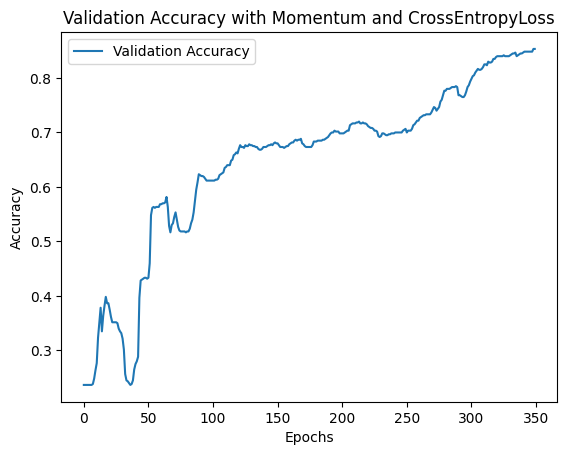

Classification Report for Test Data with Momentum and CrossEntropyLoss:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        96
           1       0.66      0.99      0.79       110
           2       0.97      0.71      0.82        90
           3       0.99      0.73      0.84       104

    accuracy                           0.85       400
   macro avg       0.90      0.85      0.86       400
weighted avg       0.90      0.85      0.86       400

Confusion Matrix for Test Data with Momentum and CrossEntropyLoss:
[[ 92   2   2   0]
 [  0 109   0   1]
 [  0  26  64   0]
 [  0  28   0  76]]


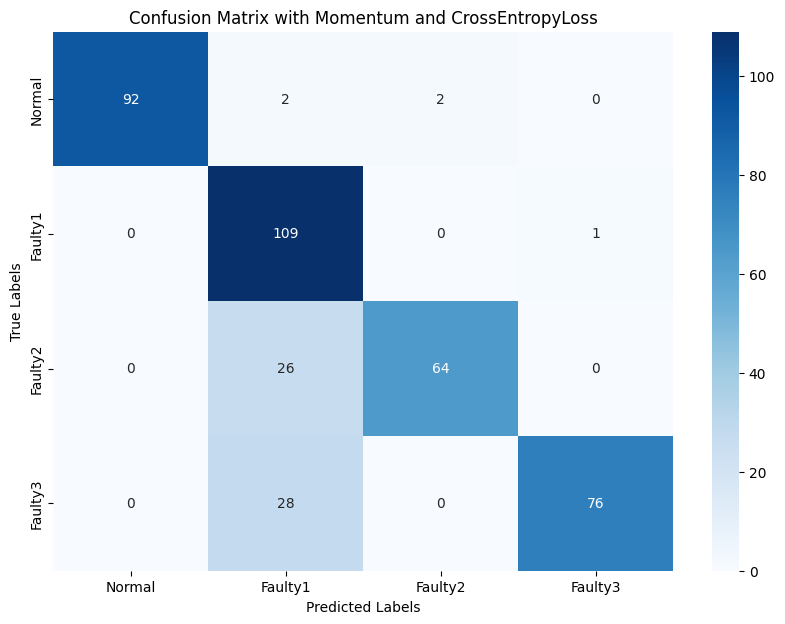

Final Train Accuracy with Momentum and CrossEntropyLoss: 0.8603333333333333
Final Validation Accuracy with Momentum and CrossEntropyLoss: 0.8533333333333334
Test Accuracy with Momentum and CrossEntropyLoss: 0.8525


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim

# Constants
M, N = 250, 200
np.random.seed(25)
my_ID_Number = 34
dataset_url = {
    'normal': 'https://engineering.case.edu/sites/default/files/99.mat',
    'faulty1': 'https://engineering.case.edu/sites/default/files/107.mat',
    'faulty2': 'https://engineering.case.edu/sites/default/files/120.mat',
    'faulty3': 'https://engineering.case.edu/sites/default/files/132.mat'
}

# Functions
def load_data(urls):
    data = {}
    for label, url in urls.items():
        !wget -q {url}  # Quiet mode, no output
        data[label] = loadmat(url.split('/')[-1])  # Load and return data
    return data

def organize_data(data, cols):
    all_matrices = {}
    for label, datasets in data.items():
        for col in cols[label]:
            mat = np.zeros((M, N))
            for j in range(M):
                try:
                    mat[j, :] = datasets[col][j:j+N].reshape(-1,)
                except Exception as e:
                    continue  # Handle case where window exceeds bounds of data
            all_matrices[f"{label}_{col}"] = mat
    return all_matrices

def extract_features(matrix):
    # Compute various statistical features from the matrix
    features = {
        'standard deviation': stats.tstd(matrix, axis=1),
        'peak': np.max(matrix, axis=1),
        'skewness': stats.skew(matrix, axis=1),
        'mean': np.mean(matrix, axis=1),
        'absolute mean': np.mean(np.abs(matrix), axis=1),
        'root mean square': np.sqrt(np.mean(np.square(matrix), axis=1)),
        'square root mean': np.square(np.mean(np.sqrt(np.abs(matrix)), axis=1)),
        'kurtosis': stats.kurtosis(matrix, axis=1),
        'crest factor': np.max(matrix, axis=1) / np.sqrt(np.mean(np.square(matrix), axis=1)),
        'clearance factor': np.max(matrix, axis=1) / np.square(np.mean(np.sqrt(np.abs(matrix)), axis=1)),
        'peak to peak': np.max(matrix, axis=1) - np.min(matrix, axis=1),
        'shape factor': np.sqrt(np.mean(np.square(matrix), axis=1)) / np.mean(np.abs(matrix), axis=1),
        'impact factor': np.sqrt(np.mean(np.square(matrix), axis=1)) / np.mean(np.abs(matrix), axis=1),
        'impulse factor': np.abs(np.mean(matrix, axis=1)) / np.mean(np.abs(matrix), axis=1)
    }
    return features

# Load all datasets
data = load_data(dataset_url)
cols = {key: list(val.keys())[-4:] for key, val in data.items()}

# Organize data into matrices
matrices = organize_data(data, cols)

# Extract features for each dataset and create dataframes
dfs = []
for label, matrix in matrices.items():
    features = extract_features(matrix)
    df = pd.DataFrame(features)
    if 'normal' in label:
        df['label'] = 0
    elif 'faulty1' in label:
        df['label'] = 1
    elif 'faulty2' in label:
        df['label'] = 2
    elif 'faulty3' in label:
        df['label'] = 3
    dfs.append(df)

# Combine all dataframes
df = pd.concat(dfs, ignore_index=True)

# Split data into training, validation, and test sets
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# First split to separate training and the remaining data
x_train, x_temp, y_train, y_temp = train_test_split(
    df.drop('label', axis=1).values,
    df['label'].values,
    test_size=1 - train_ratio,
    random_state=34,
    shuffle=True
)

# Second split to separate validation and test data
x_val, x_test, y_val, y_test = train_test_split(
    x_temp,
    y_temp,
    test_size=test_ratio / (test_ratio + validation_ratio),
    random_state=34,
    shuffle=True
)

# Standardize data
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
x_train_scaled_imputed = imputer.fit_transform(x_train_scaled)
x_val_scaled_imputed = imputer.transform(x_val_scaled)
x_test_scaled_imputed = imputer.transform(x_test_scaled)

# Convert data to PyTorch tensors
x_train_tensor = torch.tensor(x_train_scaled_imputed, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
x_val_tensor = torch.tensor(x_val_scaled_imputed, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
x_test_tensor = torch.tensor(x_test_scaled_imputed, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Define the neural network model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(x_train_tensor.shape[1], 10)
        self.fc2 = nn.Linear(10, 7)
        self.fc3 = nn.Linear(7, 4)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model, loss function, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()  # This is the default loss function for classification
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.98)

# Training loop
num_epochs = 350
train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_outputs = model(x_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_losses.append(val_loss.item())

        _, val_preds = torch.max(val_outputs, 1)
        val_accuracy = accuracy_score(y_val_tensor.numpy(), val_preds.numpy())
        val_accuracies.append(val_accuracy)

# Plotting training and validation loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss with Momentum and CrossEntropyLoss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting validation accuracy
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Validation Accuracy with Momentum and CrossEntropyLoss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Predictions on test set
model.eval()
with torch.no_grad():
    test_outputs = model(x_test_tensor)
    _, test_preds = torch.max(test_outputs, 1)

# Classification report
print("Classification Report for Test Data with Momentum and CrossEntropyLoss:")
print(classification_report(y_test_tensor.numpy(), test_preds.numpy()))

# Confusion matrix
cm = confusion_matrix(y_test_tensor.numpy(), test_preds.numpy())
print("Confusion Matrix for Test Data with Momentum and CrossEntropyLoss:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Faulty1', 'Faulty2', 'Faulty3'], yticklabels=['Normal', 'Faulty1', 'Faulty2', 'Faulty3'])
plt.title('Confusion Matrix with Momentum and CrossEntropyLoss')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Analysis
train_preds = model(x_train_tensor)
_, train_preds = torch.max(train_preds, 1)
print("Final Train Accuracy with Momentum and CrossEntropyLoss:", accuracy_score(y_train_tensor.numpy(), train_preds.numpy()))

val_preds = model(x_val_tensor)
_, val_preds = torch.max(val_preds, 1)
print("Final Validation Accuracy with Momentum and CrossEntropyLoss:", accuracy_score(y_val_tensor.numpy(), val_preds.numpy()))

print("Test Accuracy with Momentum and CrossEntropyLoss:", accuracy_score(y_test_tensor.numpy(), test_preds.numpy()))


Q2-4

<ipython-input-2-d9c2a790de85>:51: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'skewness': stats.skew(matrix, axis=1),
<ipython-input-2-d9c2a790de85>:56: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'kurtosis': stats.kurtosis(matrix, axis=1),
<ipython-input-2-d9c2a790de85>:57: RuntimeWarning: invalid value encountered in divide
  'crest factor': np.max(matrix, axis=1) / np.sqrt(np.mean(np.square(matrix), axis=1)),
<ipython-input-2-d9c2a790de85>:58: RuntimeWarning: invalid value encountered in divide
  'clearance factor': np.max(matrix, axis=1) / np.square(np.mean(np.sqrt(np.abs(matrix)), axis=1)),
<ipython-input-2-d9c2a790de85>:60: RuntimeWarning: invalid value encountered in divide
  'shape factor': np.sqrt(np.mean(np.square(matrix)

Average Validation Accuracy: 0.29425
Average Validation Loss: 2.69375


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      0.75      0.86      1000
           2       1.00      0.75      0.86      1000
           3       0.67      1.00      0.80      1000

    accuracy                           0.88      4000
   macro avg       0.92      0.88      0.88      4000
weighted avg       0.92      0.88      0.88      4000

Confusion Matrix:
[[1000    0    0    0]
 [   0  750    0  250]
 [   0    0  750  250]
 [   0    0    0 1000]]


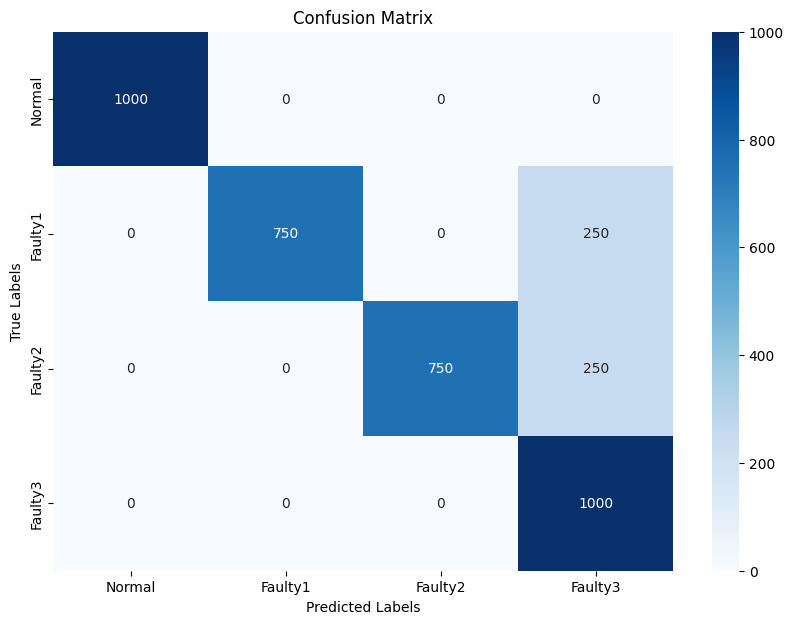

Final Model Accuracy: 0.875


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from scipy import stats
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
import seaborn as sns

# Constants
M, N = 250, 200
np.random.seed(34)
my_ID_Number = 34
dataset_url = {
    'normal': 'https://engineering.case.edu/sites/default/files/99.mat',
    'faulty1': 'https://engineering.case.edu/sites/default/files/107.mat',
    'faulty2': 'https://engineering.case.edu/sites/default/files/120.mat',
    'faulty3': 'https://engineering.case.edu/sites/default/files/132.mat'
}

# Functions
def load_data(urls):
    data = {}
    for label, url in urls.items():
        !wget -q {url}  # Quiet mode, no output
        data[label] = loadmat(url.split('/')[-1])  # Load and return data
    return data

def organize_data(data, cols):
    all_matrices = {}
    for label, datasets in data.items():
        for col in cols[label]:
            mat = np.zeros((M, N))
            for j in range(M):
                try:
                    mat[j, :] = datasets[col][j:j+N].reshape(-1,)
                except Exception as e:
                    continue  # Handle case where window exceeds bounds of data
            all_matrices[f"{label}_{col}"] = mat
    return all_matrices

def extract_features(matrix):
    # Compute various statistical features from the matrix
    features = {
        'standard deviation': stats.tstd(matrix, axis=1),
        'peak': np.max(matrix, axis=1),
        'skewness': stats.skew(matrix, axis=1),
        'mean': np.mean(matrix, axis=1),
        'absolute mean': np.mean(np.abs(matrix), axis=1),
        'root mean square': np.sqrt(np.mean(np.square(matrix), axis=1)),
        'square root mean': np.square(np.mean(np.sqrt(np.abs(matrix)), axis=1)),
        'kurtosis': stats.kurtosis(matrix, axis=1),
        'crest factor': np.max(matrix, axis=1) / np.sqrt(np.mean(np.square(matrix), axis=1)),
        'clearance factor': np.max(matrix, axis=1) / np.square(np.mean(np.sqrt(np.abs(matrix)), axis=1)),
        'peak to peak': np.max(matrix, axis=1) - np.min(matrix, axis=1),
        'shape factor': np.sqrt(np.mean(np.square(matrix), axis=1)) / np.mean(np.abs(matrix), axis=1),
        'impact factor': np.sqrt(np.mean(np.square(matrix), axis=1)) / np.mean(np.abs(matrix), axis=1),
        'impulse factor': np.abs(np.mean(matrix, axis=1)) / np.mean(np.abs(matrix), axis=1)
    }
    return features

# Load all datasets
data = load_data(dataset_url)
cols = {key: list(val.keys())[-4:] for key, val in data.items()}

# Organize data into matrices
matrices = organize_data(data, cols)

# Extract features for each dataset and create dataframes
dfs = []
for label, matrix in matrices.items():
    features = extract_features(matrix)
    df = pd.DataFrame(features)
    if 'normal' in label:
        df['label'] = 0
    elif 'faulty1' in label:
        df['label'] = 1
    elif 'faulty2' in label:
        df['label'] = 2
    elif 'faulty3' in label:
        df['label'] = 3
    dfs.append(df)

# Combine all dataframes
df = pd.concat(dfs, ignore_index=True)

# Split data into features and labels
X = df.drop('label', axis=1).values
y = df['label'].values

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_scaled_imputed = imputer.fit_transform(X_scaled)

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=4)
val_accuracies = []
val_losses = []

for train_index, val_index in skf.split(X_scaled_imputed, y):
    x_train, x_val = X_scaled_imputed[train_index], X_scaled_imputed[val_index]
    y_train, y_val = y[train_index], y[val_index]

    mlp_model = MLPClassifier(hidden_layer_sizes=(10, 7), activation='tanh', solver='adam', learning_rate_init=0.01, max_iter=50, random_state=34)
    mlp_model.fit(x_train, y_train)

    val_preds = mlp_model.predict(x_val)
    val_accuracy = accuracy_score(y_val, val_preds)
    val_loss = np.mean((val_preds - y_val) ** 2)

    val_accuracies.append(val_accuracy)
    val_losses.append(val_loss)

# Report average accuracy and loss
print("Average Validation Accuracy:", np.mean(val_accuracies))
print("Average Validation Loss:", np.mean(val_losses))

# Final training on entire dataset
mlp_model_final = MLPClassifier(hidden_layer_sizes=(10, 7), activation='tanh', solver='adam', learning_rate_init=0.01, max_iter=50, random_state=34)
mlp_model_final.fit(X_scaled_imputed, y)

# Predictions on the whole dataset
final_preds = mlp_model_final.predict(X_scaled_imputed)

# Classification report
print("Classification Report:")
print(classification_report(y, final_preds))

# Confusion matrix
cm = confusion_matrix(y, final_preds)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Faulty1', 'Faulty2', 'Faulty3'], yticklabels=['Normal', 'Faulty1', 'Faulty2', 'Faulty3'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Analysis
print("Final Model Accuracy:", accuracy_score(y, final_preds))


# Q3

 Q3-1

Accuracy: 0.9404947677620709
Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.94      0.94     31776
           2       0.95      0.95      0.95     42495
           3       0.94      0.94      0.94      5363
           4       0.86      0.85      0.85       412
           5       0.84      0.83      0.83      1424
           6       0.89      0.88      0.88      2605
           7       0.95      0.95      0.95      3077

    accuracy                           0.94     87152
   macro avg       0.91      0.90      0.91     87152
weighted avg       0.94      0.94      0.94     87152

Confusion Matrix:
[[29834  1767     3     0    19     4   149]
 [ 1745 40367   100     0   184    82    17]
 [    0   105  5016    38    14   190     0]
 [    0     0    48   349     0    15     0]
 [   21   203    13     0  1178     8     1]
 [    9    92   178    20     4  2302     0]
 [  140    17     0     0     0     0  2920]]


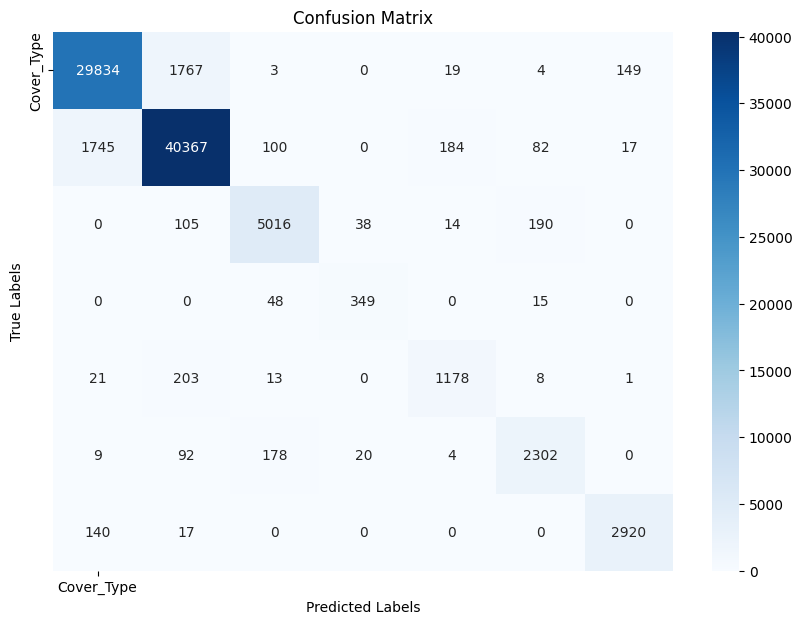

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# Load the dataset
data = fetch_covtype()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=34, stratify=y)

# Create and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=34)
clf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Accuracy: 0.9404947677620709
Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.94      0.94     31776
           2       0.95      0.95      0.95     42495
           3       0.94      0.94      0.94      5363
           4       0.86      0.85      0.85       412
           5       0.84      0.83      0.83      1424
           6       0.89      0.88      0.88      2605
           7       0.95      0.95      0.95      3077

    accuracy                           0.94     87152
   macro avg       0.91      0.90      0.91     87152
weighted avg       0.94      0.94      0.94     87152

Confusion Matrix:
[[29834  1767     3     0    19     4   149]
 [ 1745 40367   100     0   184    82    17]
 [    0   105  5016    38    14   190     0]
 [    0     0    48   349     0    15     0]
 [   21   203    13     0  1178     8     1]
 [    9    92   178    20     4  2302     0]
 [  140    17     0     0     0     0  2920]]


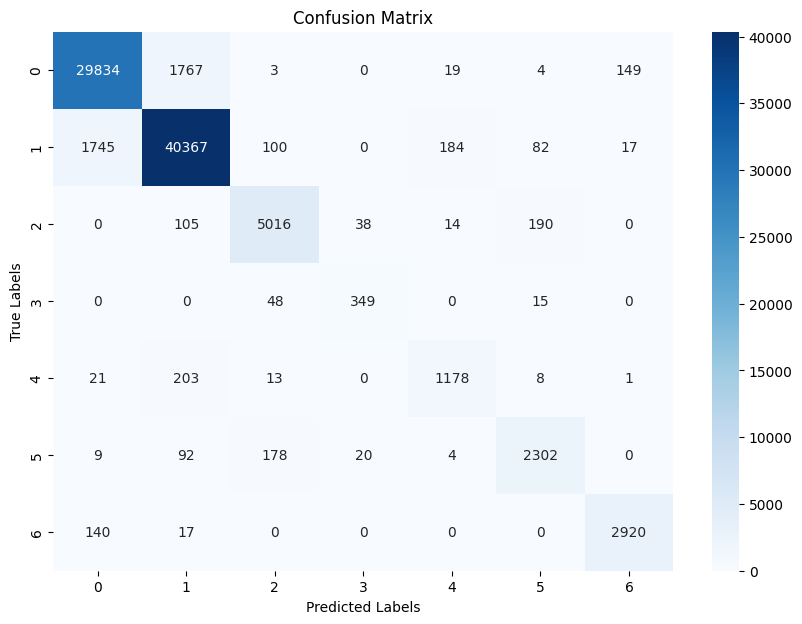

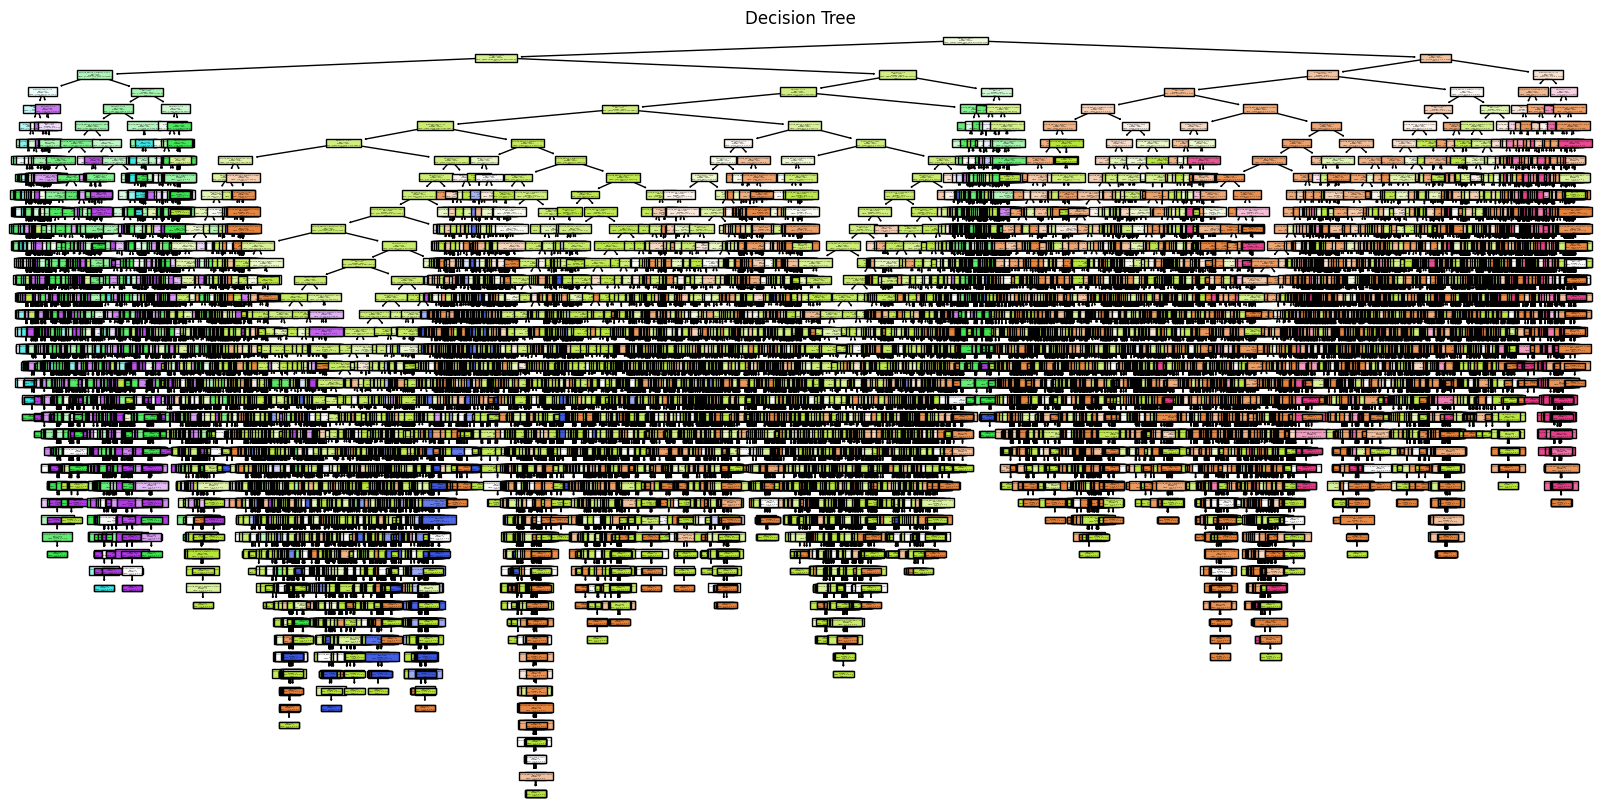

Feature ranking:
1. feature 0 (0.3376556161990264)
2. feature 5 (0.1519290672400148)
3. feature 9 (0.1380263270675986)
4. feature 3 (0.06334506676784567)
5. feature 4 (0.04540900227722515)
6. feature 7 (0.03349188616335191)
7. feature 6 (0.02878890915335089)
8. feature 1 (0.02619841655013067)
9. feature 8 (0.02336733092309916)
10. feature 2 (0.017453381449526816)
11. feature 12 (0.013382201898255692)
12. feature 45 (0.013047936038031246)
13. feature 17 (0.011838734050749427)
14. feature 36 (0.010419597124092015)
15. feature 15 (0.00956827096238418)
16. feature 35 (0.008159857127361074)
17. feature 10 (0.007097299913000778)
18. feature 42 (0.006738085562562137)
19. feature 46 (0.006020777733801313)
20. feature 11 (0.00436555353369152)
21. feature 37 (0.004361394545892849)
22. feature 44 (0.004335092631680153)
23. feature 52 (0.004109989816740735)
24. feature 33 (0.0031416851065254733)
25. feature 26 (0.0030153873844853954)
26. feature 23 (0.002896589177672205)
27. feature 43 (0.00274357

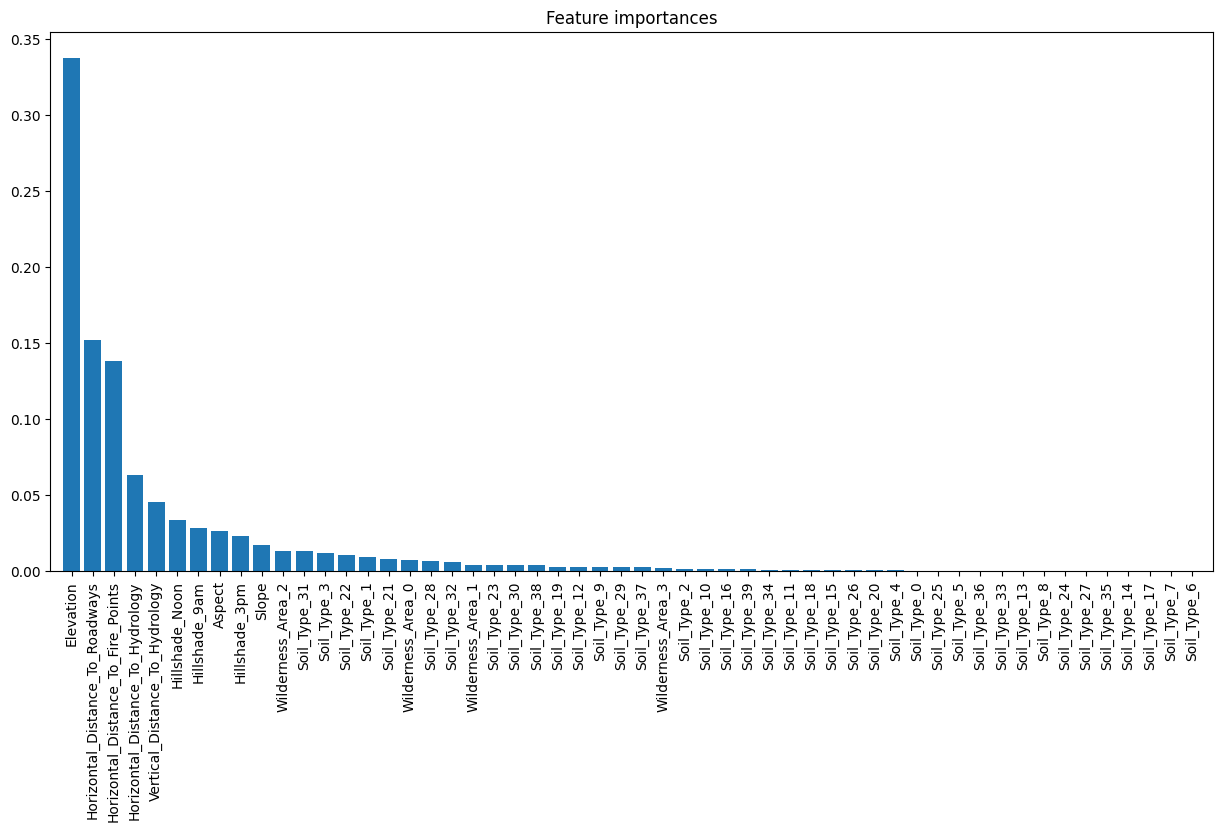

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# Load the dataset
data = fetch_covtype()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=34, stratify=y)

# Create and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=34)
clf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=[str(i) for i in np.unique(y)])
plt.title('Decision Tree')
plt.show()

# Feature importances
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]})")

# Plot the feature importances
plt.figure(figsize=(15, 7))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(data.feature_names)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


Accuracy: 0.9565217391304348
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.88      0.93         8
           2       0.88      1.00      0.93         7

    accuracy                           0.96        23
   macro avg       0.96      0.96      0.96        23
weighted avg       0.96      0.96      0.96        23

Confusion Matrix:
[[8 0 0]
 [0 7 1]
 [0 0 7]]


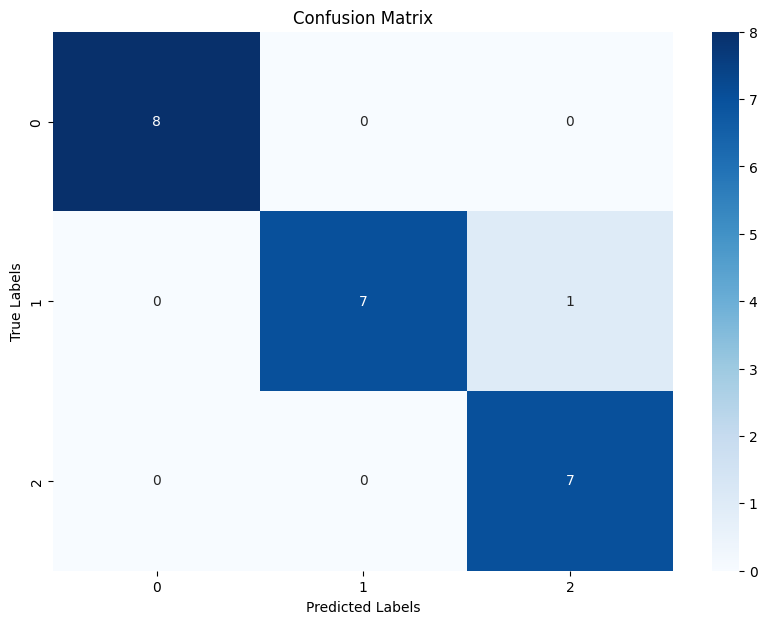

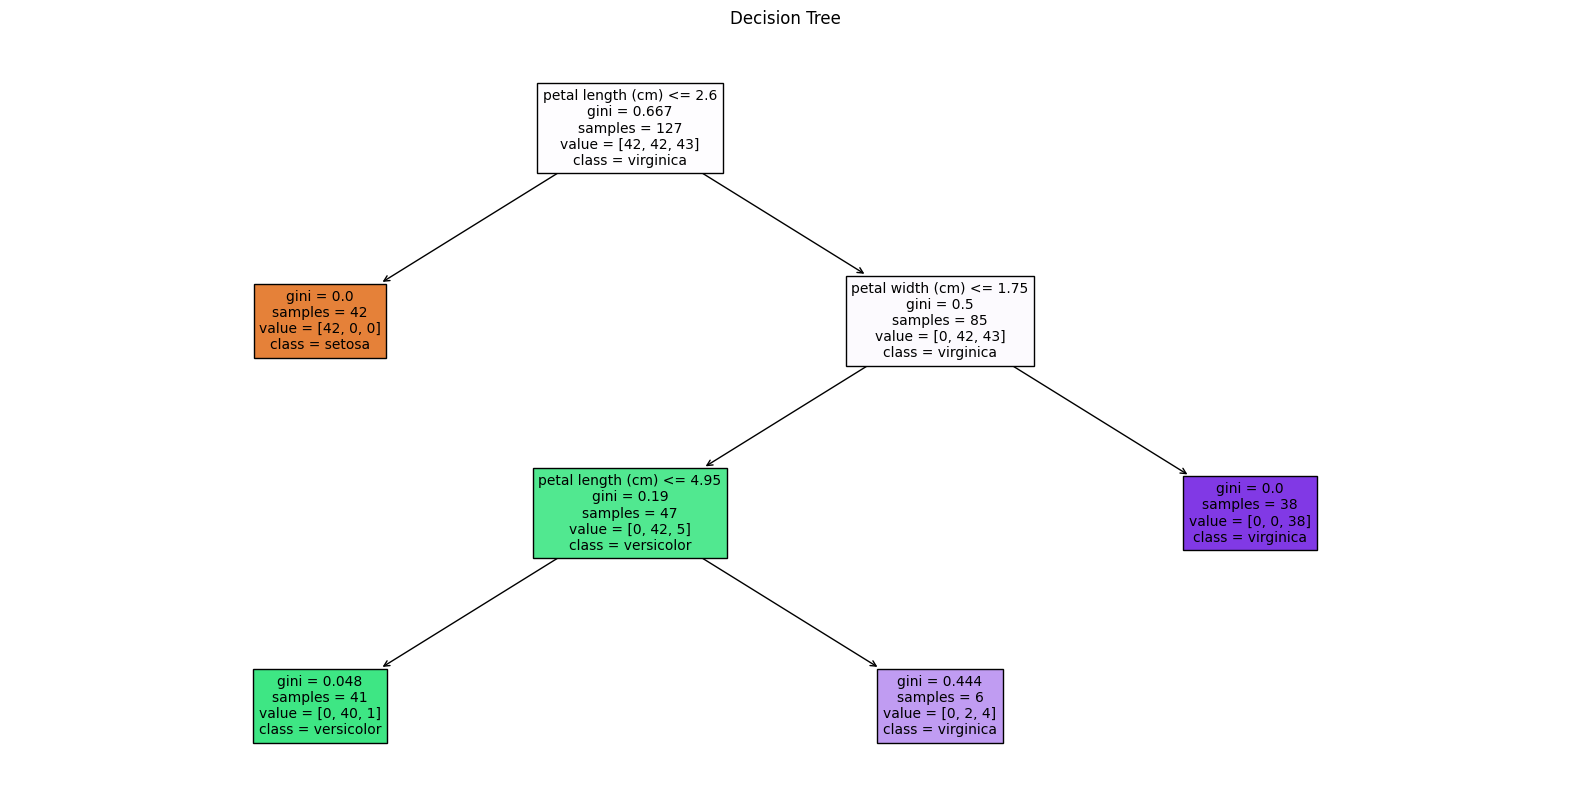

Feature ranking:
1. feature 2 (0.58075378541293)
2. feature 3 (0.4192462145870701)
3. feature 1 (0.0)
4. feature 0 (0.0)


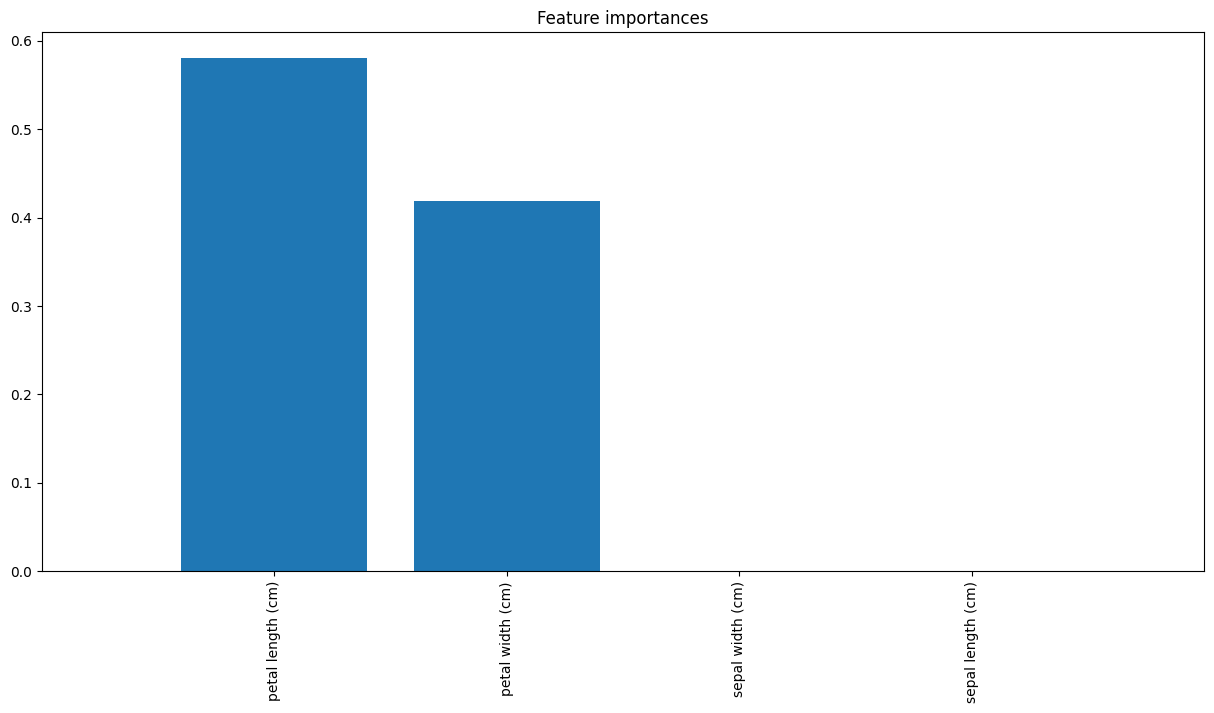

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# Load the dataset
data = load_iris()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=34, stratify=y)

# Create and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=34, max_depth=3)  # Limit the depth of the tree
clf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot the tree with readable parameters
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names, fontsize=10)
plt.title('Decision Tree')
plt.show()

# Feature importances
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]})")

# Plot the feature importances
plt.figure(figsize=(15, 7))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(data.feature_names)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


Q3-2

Default Parameters:
Accuracy: 0.9406
Precision: 0.9406
Recall: 0.9406
F1 Score: 0.9406
Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.94      0.94     31776
           2       0.95      0.95      0.95     42495
           3       0.94      0.94      0.94      5363
           4       0.86      0.84      0.85       412
           5       0.84      0.83      0.84      1424
           6       0.89      0.88      0.88      2605
           7       0.95      0.95      0.95      3077

    accuracy                           0.94     87152
   macro avg       0.91      0.90      0.91     87152
weighted avg       0.94      0.94      0.94     87152

Confusion Matrix:
[[29834  1769     3     0    19     4   147]
 [ 1742 40373    99     0   182    82    17]
 [    0   105  5016    38    15   189     0]
 [    0     0    49   348     0    15     0]
 [   21   200    13     0  1181     8     1]
 [    9    93   178    21     4  2300     0]
 [  1

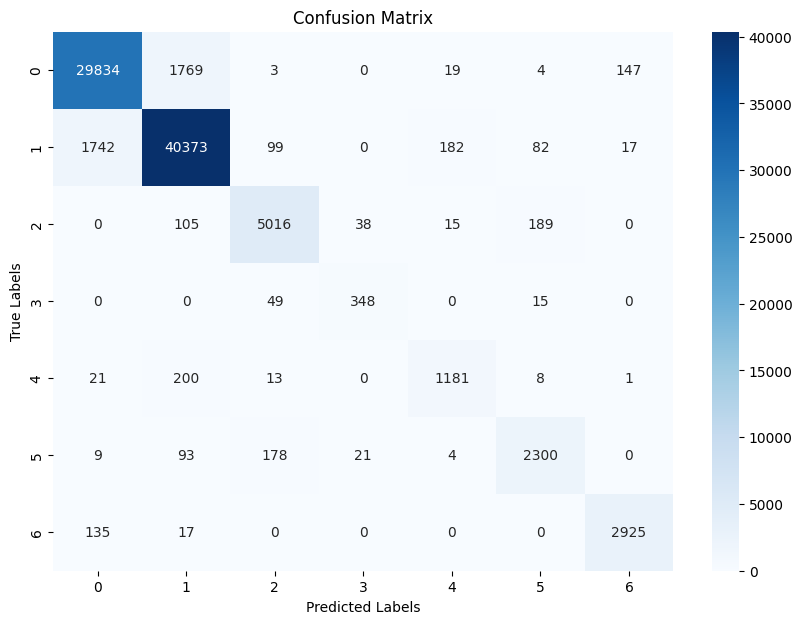

Max Depth = 10:
Accuracy: 0.7768
Precision: 0.7775
Recall: 0.7768
F1 Score: 0.7699
Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.75      0.76     31776
           2       0.78      0.84      0.81     42495
           3       0.75      0.86      0.80      5363
           4       0.84      0.70      0.76       412
           5       0.76      0.24      0.37      1424
           6       0.78      0.26      0.39      2605
           7       0.88      0.70      0.78      3077

    accuracy                           0.78     87152
   macro avg       0.79      0.62      0.67     87152
weighted avg       0.78      0.78      0.77     87152

Confusion Matrix:
[[23753  7713     3     0    27     1   279]
 [ 6257 35839   233     0    79    77    10]
 [    0   595  4625    37     0   106     0]
 [    0     4   110   287     0    11     0]
 [   69   990    22     0   343     0     0]
 [   17   735  1146    18     1   688     0]
 [  882  

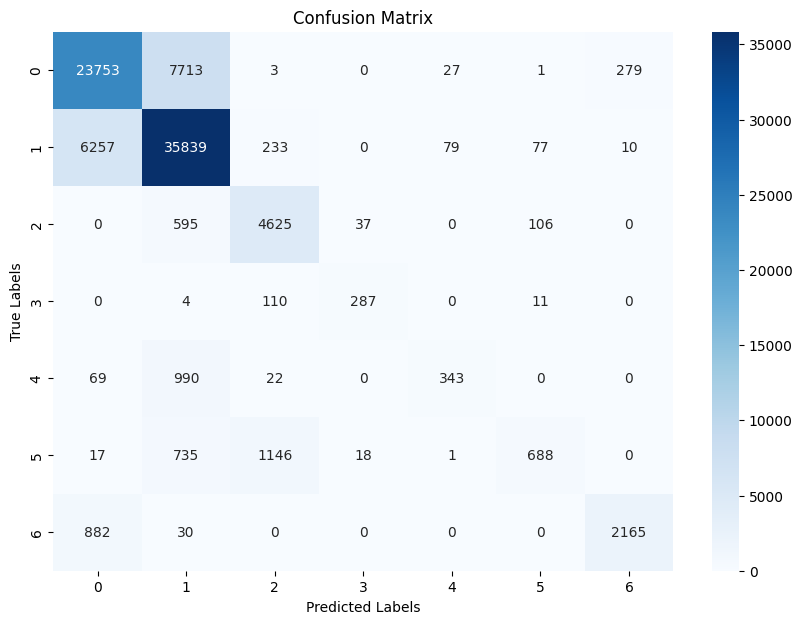

Min Samples Split = 20:
Accuracy: 0.9276
Precision: 0.9275
Recall: 0.9276
F1 Score: 0.9275
Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.93      0.93     31776
           2       0.94      0.94      0.94     42495
           3       0.92      0.93      0.92      5363
           4       0.85      0.81      0.83       412
           5       0.80      0.77      0.78      1424
           6       0.87      0.85      0.86      2605
           7       0.94      0.93      0.94      3077

    accuracy                           0.93     87152
   macro avg       0.89      0.88      0.89     87152
weighted avg       0.93      0.93      0.93     87152

Confusion Matrix:
[[29510  2065     3     0    32     4   162]
 [ 2191 39864   119     0   222    81    18]
 [    2   132  4961    40    17   211     0]
 [    0     1    58   335     0    18     0]
 [   30   275    15     0  1094    10     0]
 [   10   112   250    18     6  2209     0]
 

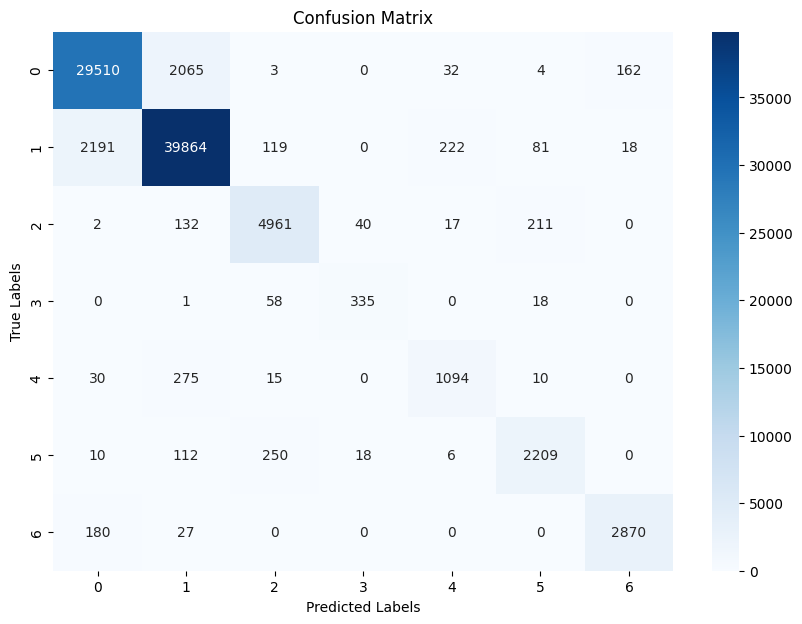

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Load the dataset
data = fetch_covtype()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=34, stratify=y)

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to evaluate the model
def evaluate_model(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Train and evaluate with default parameters
clf_default = DecisionTreeClassifier(random_state=34)
clf_default.fit(X_train_scaled, y_train)
print("Default Parameters:")
evaluate_model(clf_default, X_test_scaled, y_test)

# Train and evaluate with max_depth=10
clf_max_depth = DecisionTreeClassifier(random_state=34, max_depth=10)
clf_max_depth.fit(X_train_scaled, y_train)
print("Max Depth = 10:")
evaluate_model(clf_max_depth, X_test_scaled, y_test)

# Train and evaluate with min_samples_split=20
clf_min_samples_split = DecisionTreeClassifier(random_state=34, min_samples_split=20)
clf_min_samples_split.fit(X_train_scaled, y_train)
print("Min Samples Split = 20:")
evaluate_model(clf_min_samples_split, X_test_scaled, y_test)


Q3-3

Random Forest Classifier:
Accuracy: 0.9558
Precision: 0.9559
Recall: 0.9558
F1 Score: 0.9555
Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.94      0.95     31776
           2       0.95      0.97      0.96     42495
           3       0.95      0.96      0.95      5363
           4       0.91      0.87      0.89       412
           5       0.95      0.78      0.86      1424
           6       0.93      0.90      0.92      2605
           7       0.98      0.95      0.96      3077

    accuracy                           0.96     87152
   macro avg       0.95      0.91      0.93     87152
weighted avg       0.96      0.96      0.96     87152

Confusion Matrix:
[[29971  1730     2     0     3     5    65]
 [  897 41428    70     0    55    38     7]
 [    0    78  5161    20     5    99     0]
 [    0     0    40   359     0    13     0]
 [   23   264    13     0  1116     8     0]
 [    5    71   175    15     0  2339     0]

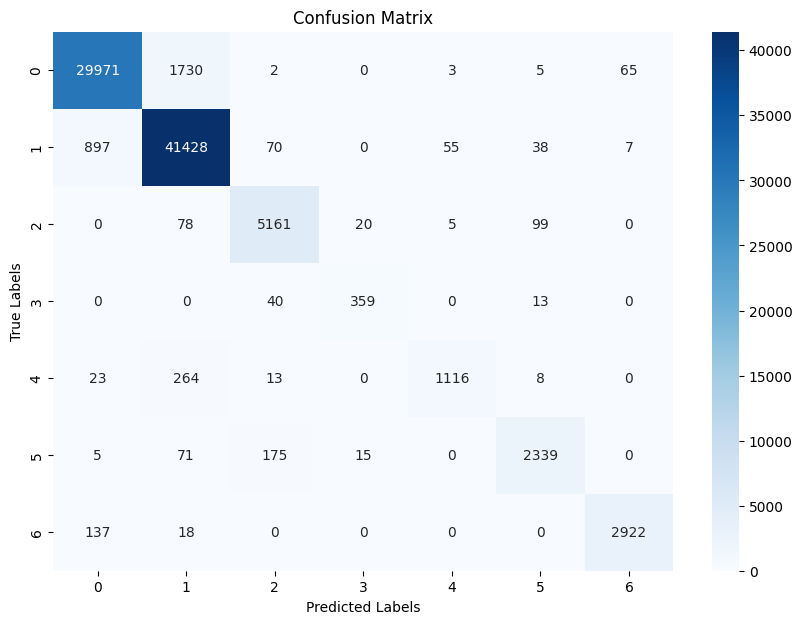

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Load the dataset
data = fetch_covtype()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=34, stratify=y)

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to evaluate the model
def evaluate_model(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Train and evaluate with Random Forest
clf_rf = RandomForestClassifier(random_state=34, n_estimators=100, max_depth=None, min_samples_split=2)
clf_rf.fit(X_train_scaled, y_train)
print("Random Forest Classifier:")
evaluate_model(clf_rf, X_test_scaled, y_test)


# Q4

Downloading...
From: https://drive.google.com/uc?id=1l5QpRb_WwVv4_A2gEyyU1ykzW44J-HYb
To: /content/heartdataset.csv
100%|██████████| 38.1k/38.1k [00:00<00:00, 45.2MB/s]


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
Accuracy: 0.8000
Classification Report:
              precision    recall  f1-score   support

  No Disease       0.80      0.78      0.79       100
     Disease       0.80      0.82      0.81       105

    accuracy                           0.80       205


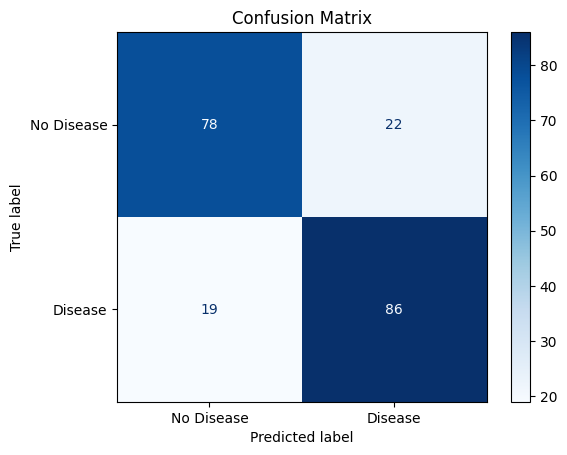

Macro-averaged metrics calculate the metric independently for each class and then take the average, treating all classes equally.
Micro-averaged metrics aggregate the contributions of all classes to compute the average metric, giving more weight to classes with more samples.
Comparison of Actual and Predicted Labels for Random Samples:
   Actual  Predicted
0       1          1
1       0          0
2       1          1
3       1          1
4       1          1


In [8]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import gdown

# Install gdown if not already installed
!pip install --upgrade --no-cache-dir gdown

# Download the dataset
url = 'https://drive.google.com/uc?id=1l5QpRb_WwVv4_A2gEyyU1ykzW44J-HYb'
output = 'heartdataset.csv'
gdown.download(url, output, quiet=False)

# Load the dataset
dataset = pd.read_csv(output)
print(dataset.head())
list_of_column_names = list(dataset.columns)
print(list_of_column_names)

# Shuffle the dataset
dataset = shuffle(dataset, random_state=34)

# Split the data into features and target
X = dataset.drop('target', axis=1)
y = dataset['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Fit the model
gnb.fit(X_train_scaled, y_train)

# Predict the labels for the test set
y_pred = gnb.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['No Disease', 'Disease'])
print("Classification Report:")
print(report)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disease', 'Disease'])
cmd.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Explanation of Macro vs. Micro
print("Macro-averaged metrics calculate the metric independently for each class and then take the average, treating all classes equally.")
print("Micro-averaged metrics aggregate the contributions of all classes to compute the average metric, giving more weight to classes with more samples.")

# Select five random samples from the test set
np.random.seed(34)
random_indices = np.random.choice(len(X_test), size=5, replace=False)
random_samples = X_test.iloc[random_indices]
random_samples_scaled = X_test_scaled[random_indices]

# Predict the labels for the random samples
random_preds = gnb.predict(random_samples_scaled)

# Compare the actual and predicted labels
comparison = pd.DataFrame({
    'Actual': y_test.iloc[random_indices].values,
    'Predicted': random_preds
})

print("Comparison of Actual and Predicted Labels for Random Samples:")
print(comparison)
